# Introduction

This notebook presents a comprehensive analysis of the Gallstone Dataset, generously provided by the Ankara VM Medical Park Hospital. Gallstones, or cholelithiasis, represent a common and significant health issue, and understanding their underlying factors is crucial for prevention and diagnosis.

The primary goal of this analysis is to explore the relationships between patient demographics, lifestyle factors, and various clinical measurements to identify key predictors of gallstone formation. We will employ a combination of exploratory data analysis (EDA), statistical testing, and machine learning techniques to uncover meaningful patterns and build a predictive model. The insights derived from this dataset aim to contribute to a data-driven understanding of gallstone pathology.

Gallstones are hardened deposits of digestive fluid that can form in the gallbladder, affecting a significant percentage of the global population. While often asymptomatic, they can lead to severe pain, inflammation, and life-threatening complications, making their early detection and risk assessment a clinical priority.





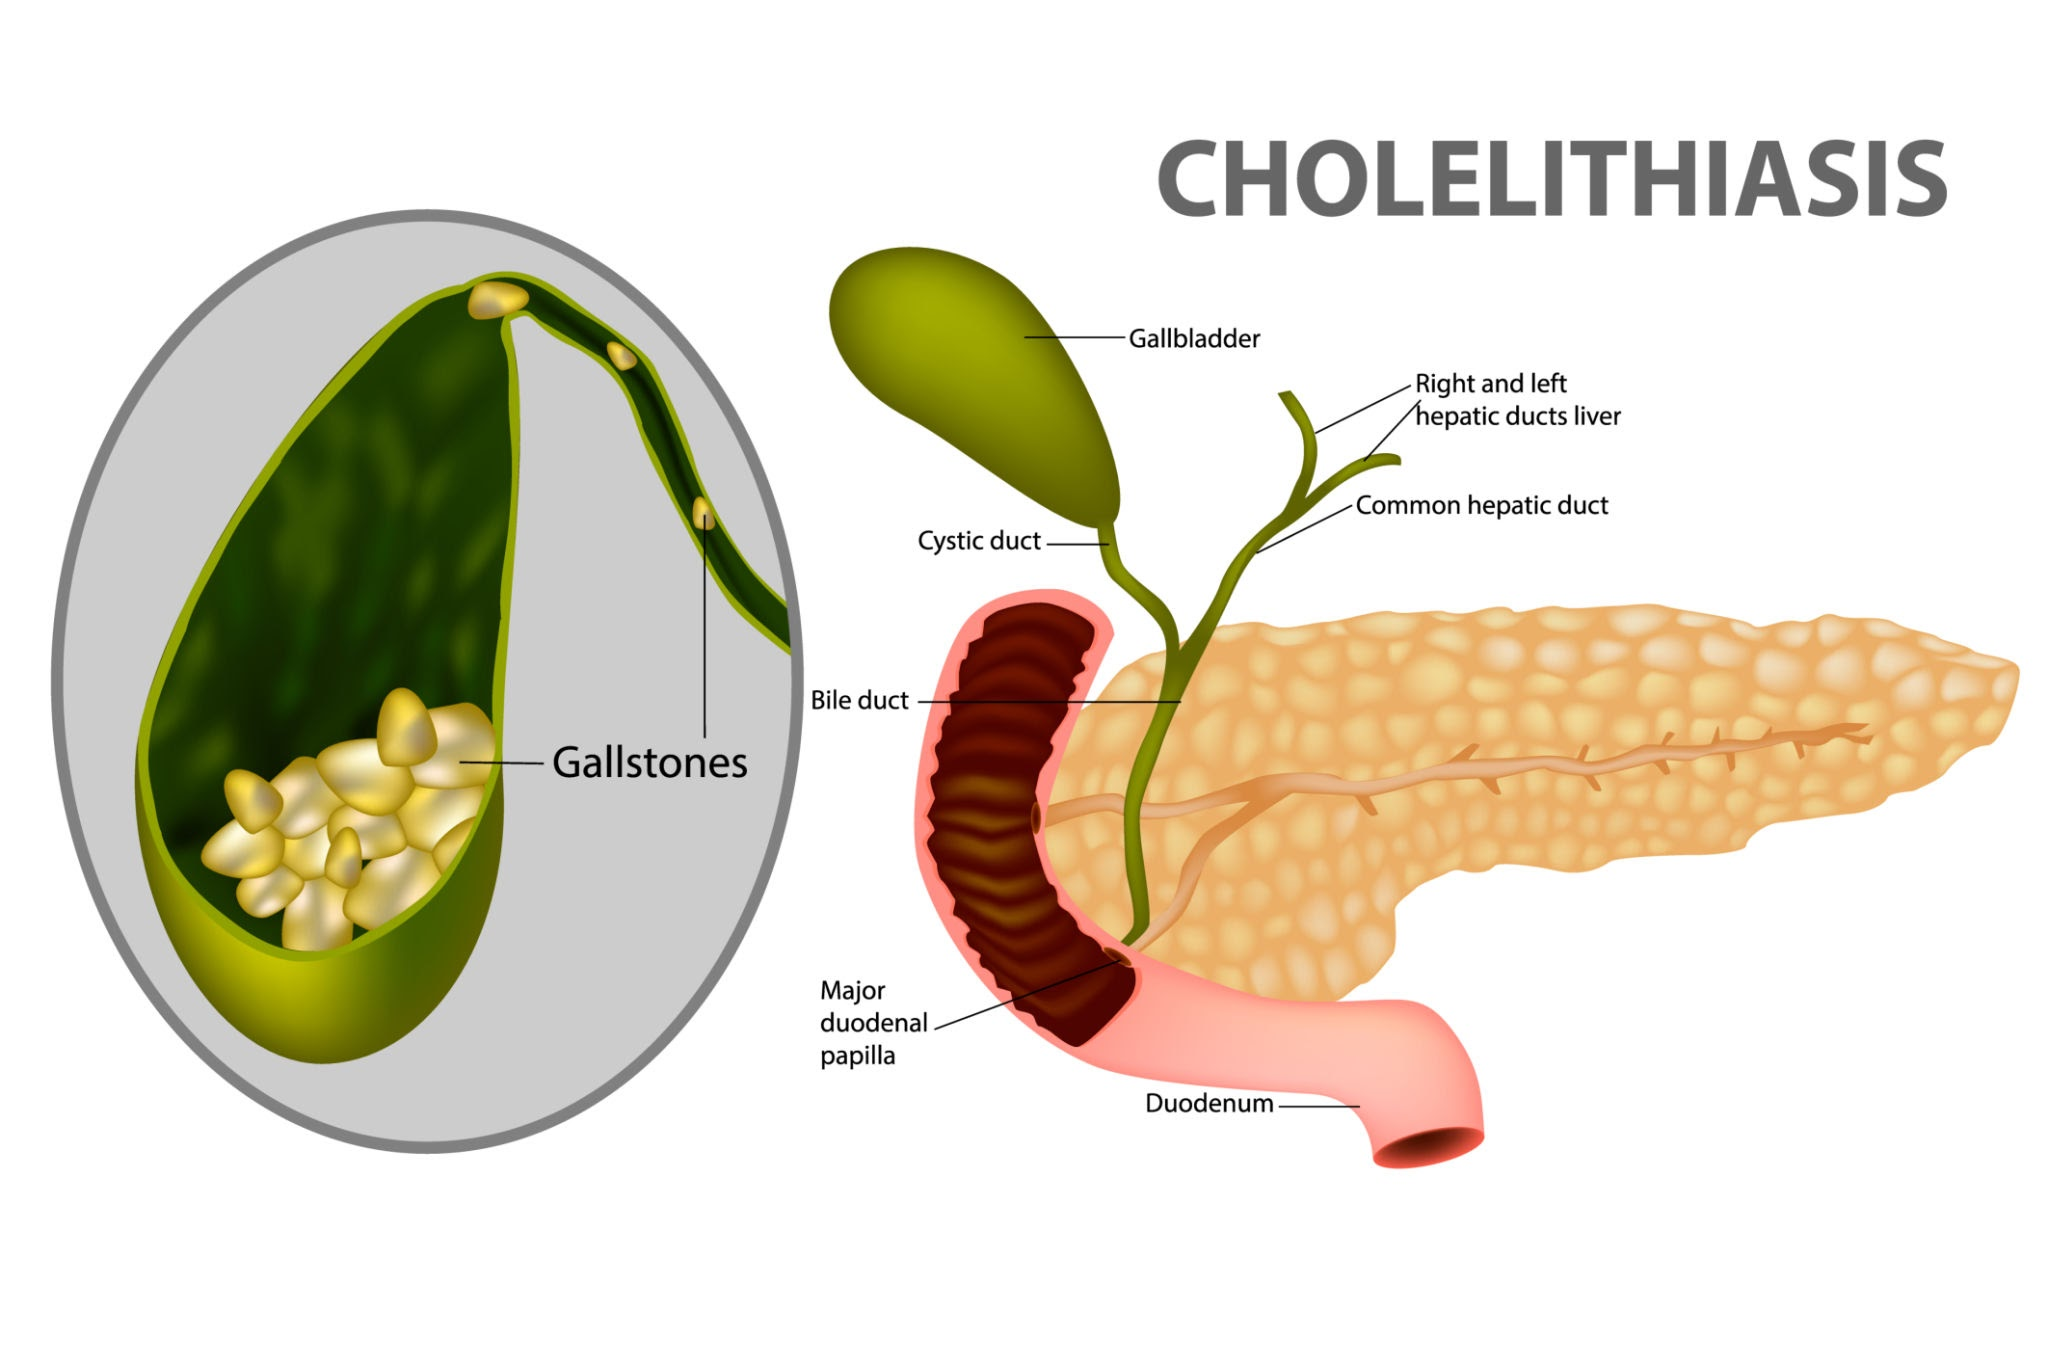

# Modules Used

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing Data

In [195]:
data = pd.read_csv("/home/bhawesh/Programming/Capstone Project/Dataset/gallstone_.csv")
data.head()

Gallstone Status  Age  Gender  Comorbidity  Coronary Artery Disease (CAD)  \
0                 0   50       0            0                              0   
1                 0   47       0            1                              0   
2                 0   61       0            0                              0   
3                 0   41       0            0                              0   
4                 0   42       0            0                              0   

   Hypothyroidism  Hyperlipidemia  Diabetes Mellitus (DM)  Height  Weight  \
0               0               0                       0     185    92.8   
1               0               0                       0     176    94.5   
2               0               0                       0     171    91.1   
3               0               0                       0     168    67.7   
4               0               0                       0     178    89.6   

   ...  High Density Lipoprotein (HDL)  Triglyceride  \
0  ...                            40.0         134.0   
1  ...                            43.0         103.0   
2  ...                            43.0          69.0   
3  ...                            59.0          53.0   
4  ...                            30.0         326.0   

   Aspartat Aminotransferaz (AST)  Alanin Aminotransferaz (ALT)  \
0                            20.0                          22.0   
1                            14.0                          13.0   
2                            18.0                          14.0   
3                            20.0                          12.0   
4                            27.0                          54.0   

   Alkaline Phosphatase (ALP)  Creatinine  Glomerular Filtration Rate (GFR)  \
0                        87.0        0.82                            112.47   
1                        46.0        0.87                            107.10   
2                        66.0        1.25                             65.51   
3                        34.0        1.02                             94.10   
4                        71.0        0.82                            112.47   

   C-Reactive Protein (CRP)  Hemoglobin (HGB)  Vitamin D  
0                       0.0              16.0       33.0  
1                       0.0              14.4       25.0  
2                       0.0              16.2       30.2  
3                       0.0              15.4       35.4  
4                       0.0              16.8       40.6  

[5 rows x 39 columns]

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

### Dataset Features

This dataset includes 38 features from 319 patients, categorized as follows:

---

#### 1. Patient Status & Demographics
| Feature | Description | Type / Encoding |
| :--- | :--- | :--- |
| **Gallstone Status** | Target variable indicating gallstone presence | Binary (0=Positive, 1=Negative) |
| **Age** | Patient's age in years | Integer |
| **Gender** | Patient's biological sex | Binary (0=Male, 1=Female) |
| **Comorbidity** | Number of co-existing medical conditions | Categorical (0, 1, 2, or 3) |

---

#### 2. Specific Health Conditions
This category details the presence of specific comorbidities. All features are binary (0=No, 1=Yes).

| Feature | Description |
| :--- | :--- |
| **CAD** | Coronary Artery Disease |
| **Hypothyroidism** | Underactive thyroid condition |
| **Hyperlipidemia**| High level of lipids (fats) in the blood |
| **DM** | Diabetes Mellitus |

---

#### 3. Anthropometry & Body Composition
These features relate to body size, shape, and composition.

| Feature | Unit | | Feature | Unit |
| :--- | :--- | :-- |:--- | :--- |
| **Height** | cm | | **Protein** | % |
| **Weight** | kg | | **VFR (Visceral Fat Rating)** | kg |
| **BMI (Body Mass Index)** | kg/m² | | **BM (Bone Mass)** | kg |
| **TBW (Total Body Water)** | % | | **MM (Muscle Mass)** | kg |
| **ECW (Extracellular Water)** | kg | | **Obesity** | % |
| **ICW (Intracellular Water)**| kg | | **TFC (Total Fat Content)**| kg |
| **ECF/TBW Ratio** | % | | **VFA (Visceral Fat Area)**| cm² |
| **TBFR (Total Body Fat Ratio)**| % | | **VMA (Visceral Muscle Area)**| cm² |
| **LM (Lean Mass)** | % | | **HFA (Hepatic Fat Accumulation)**| kg |

---

#### 4. Biochemical & Blood Markers
These features are results from various blood tests.

| Feature | Description | Unit |
| :--- | :--- | :--- |
| **Glucose** | Blood sugar level | mg/dL |
| **TC** | Total Cholesterol | mg/dL |
| **LDL** | Low-Density Lipoprotein | mg/dL |
| **HDL** | High-Density Lipoprotein | mg/dL |
| **Triglyceride** | Type of fat in the blood | mg/dL |
| **AST** | Aspartate Aminotransferase | U/L |
| **ALT** | Alanine Aminotransferase | U/L |
| **ALP** | Alkaline Phosphatase | U/L |
| **Creatinine** | Kidney function marker | mg/dL |
| **GFR** | Glomerular Filtration Rate | ml/sec |
| **CRP** | C-Reactive Protein (inflammation marker) | mg/L |
| **HGB** | Hemoglobin | g/dL |
| **Vitamin D** | Vitamin D level | ng/mL |
```

# Explatory Data Analysis

### Correlation Heatmap Analysis

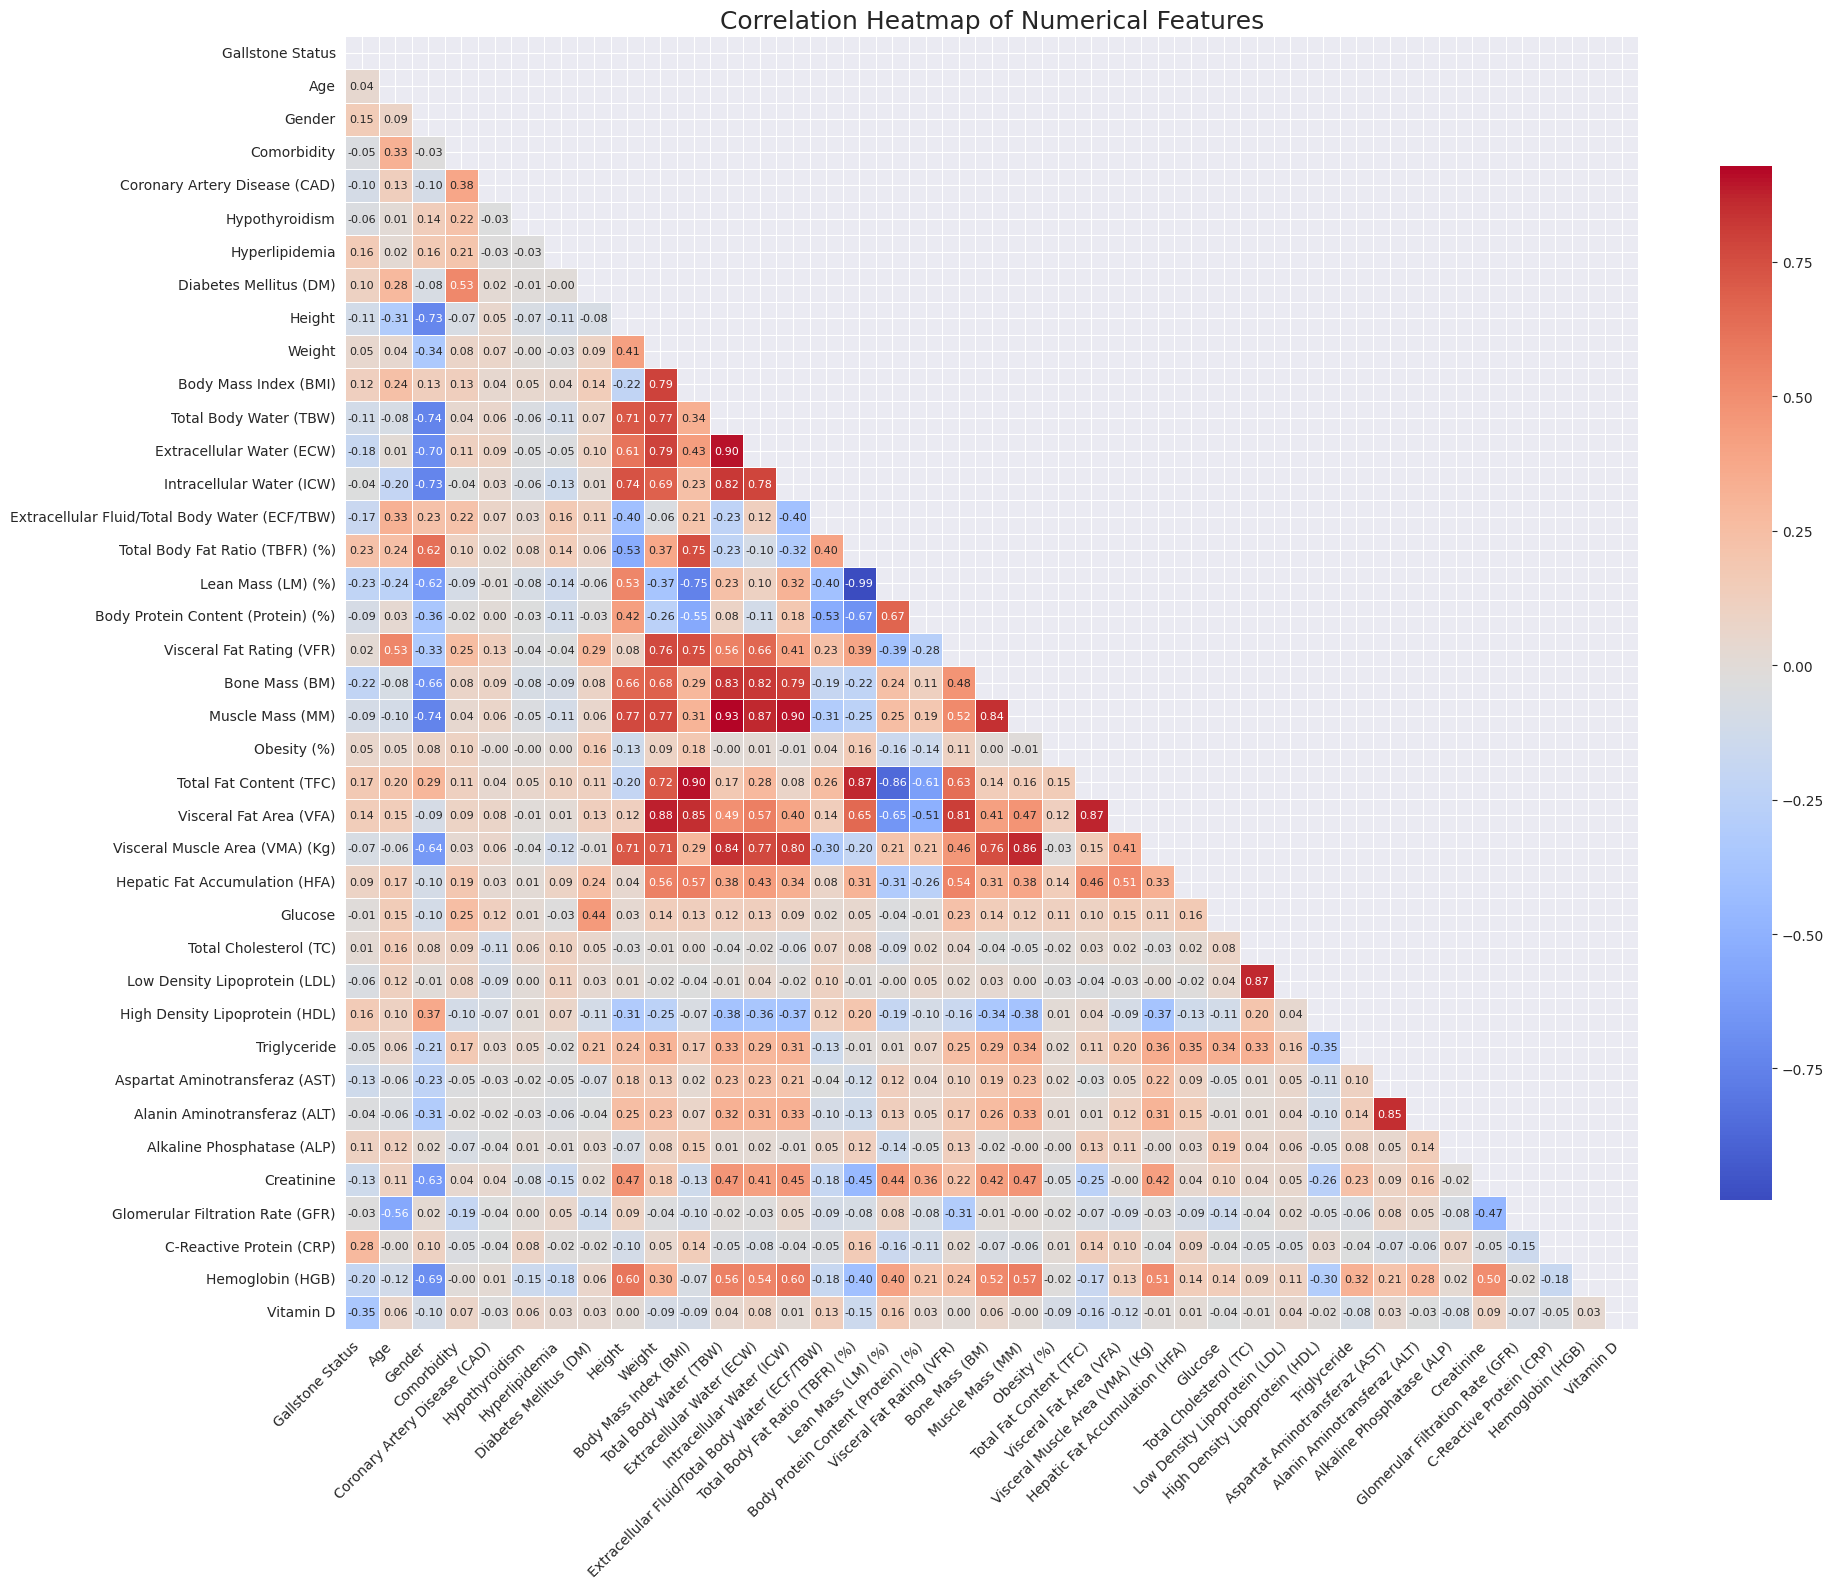

In [125]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(20, 16))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": .8},
    square=True,
    annot_kws={"size": 8}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


This heatmap visualizes the Pearson correlation coefficients between all numerical features in the dataset. It provides a quick overview of the linear relationships between variables.

* **Color Scale:** Bright red tones indicate a strong **positive correlation** (as one variable increases, the other tends to increase), while dark blue tones indicate a strong **negative correlation** (as one variable increases, the other tends to decrease). Pale colors signify a weak or no linear relationship.

#### Key Observations:

1.  **Multicollinearity:** There is a large, dark red block among the **anthropometry and body composition features** (like `Weight`, `BMI`, `Obesity`, `TFC`, etc.). This indicates these variables are highly correlated with each other and measure similar aspects of body size. This is a classic sign of **multicollinearity**, which is important to consider for modeling.

2.  **Correlations with Gallstone Status:** We can look at the first column to see how other features correlate with `Gallstone Status`. Since `Gallstone Status` is encoded as `0` (Positive) and `1` (Negative):
    * A **negative correlation** suggests a potential **risk factor** (as the feature's value goes up, the likelihood of having gallstones increases).
    * A **positive correlation** suggests a potential **protective factor**.

    The strongest indicators for gallstone presence appear to be:
    * **Negative Correlations (Risk Factors):** `ALT` (-0.24), `AST` (-0.23), `Visceral Fat Rating` (-0.22), and `Triglyceride` (-0.20) show the most notable negative correlations.
    * **Positive Correlations (Protective Factors):** `HDL` (0.22) has the strongest positive correlation, suggesting that higher levels of HDL are associated with a lower likelihood of having gallstones.

### Age Distribution

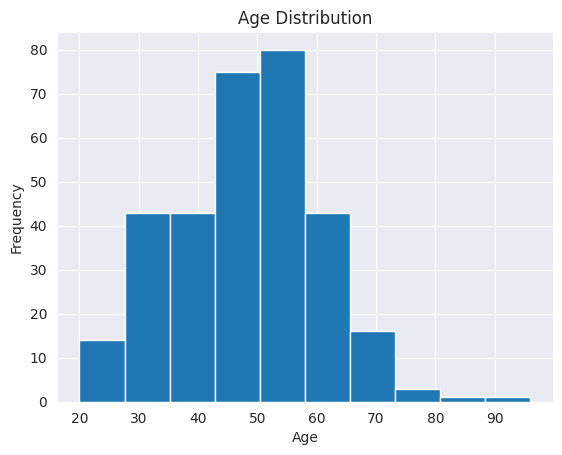

In [126]:
##Age distribution
data["Age"].plot(kind = "hist")
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()


This histogram illustrates the age distribution of the patients, revealing that the study's population is predominantly middle-aged. The data is unimodal and slightly right-skewed, with the distribution peaking for patients in the 50-60 year age range. Overall, the vast majority of individuals are concentrated between 40 and 60 years old, with significantly fewer patients at the younger and older ends of the spectrum.

### Gender Distribution

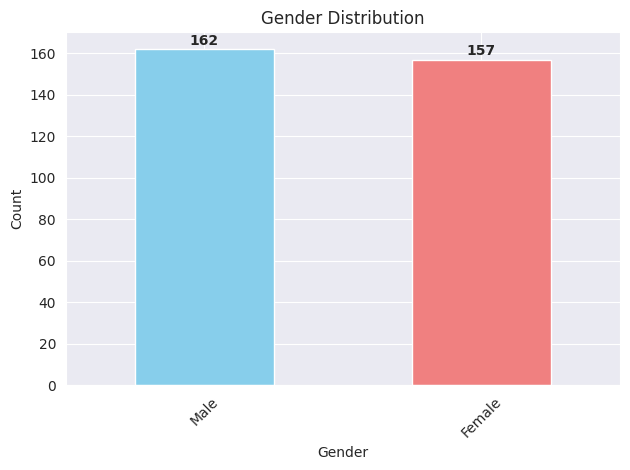

In [127]:
# Gender Distribution
ax = data["Gender"].value_counts().plot(kind="bar", color=["skyblue", "lightcoral"])

# Adding count labels on top of bars
for i, count in enumerate(data["Gender"].value_counts()):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customizing the plot
plt.xticks(ticks=[0, 1], labels=["Male", "Female"], rotation=45)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()

plt.show()

This bar chart illustrates the gender distribution within the patient dataset, revealing a nearly equal and well-balanced split between the groups. The data includes 162 males and 157 females. This balanced representation is beneficial as it helps prevent gender from becoming a biasing factor in the subsequent analysis.

### Gender Distribution Across Age

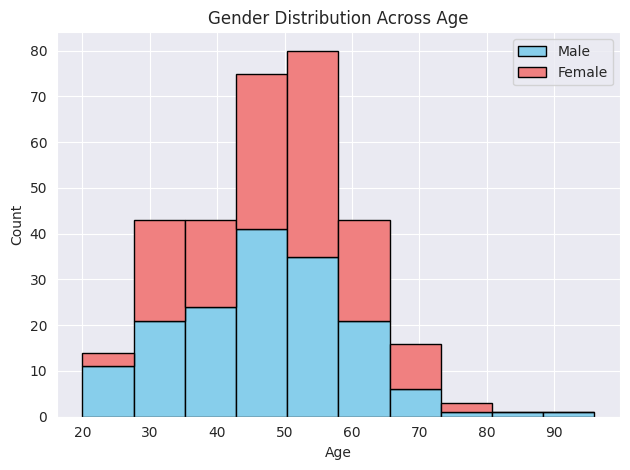

In [128]:
# Distribution of Gender over the age

# Split data by gender
male_ages = data[data['Gender'] == 0]['Age']
female_ages = data[data['Gender'] == 1]['Age']

# Plot
plt.hist([male_ages, female_ages], bins=10, stacked=True, label=['Male', 'Female'], color=['skyblue', 'lightcoral'], edgecolor='black')

plt.title("Gender Distribution Across Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


This stacked histogram breaks down the gender distribution within different age groups, providing a more detailed demographic view. While the overall dataset is gender-balanced, this chart reveals that females are more predominant in the 30-40 and 50-60 age brackets. Conversely, males appear more frequently in the 40-50 age group. This visualization effectively shows how the composition of patients varies across their lifespan, offering more nuance than looking at age or gender alone.

### Gallstone Status Distribution

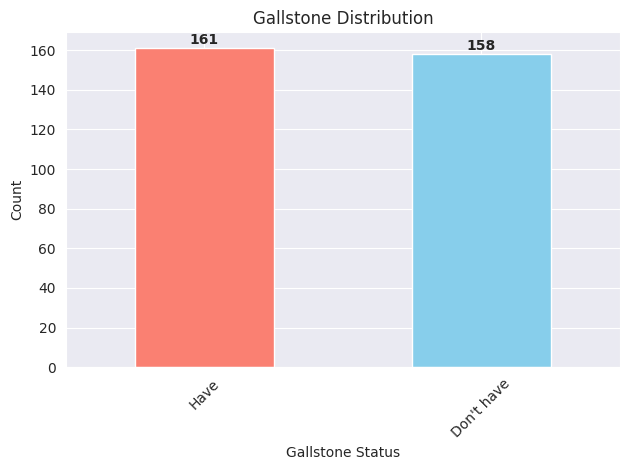

In [129]:
ax = data["Gallstone Status"].value_counts().plot(kind = "bar",  color=["salmon", "skyblue"])

for i, count in enumerate(data["Gallstone Status"].value_counts()):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(ticks=[0, 1], labels=["Have", "Don't have"], rotation=45)
plt.title("Gallstone Distribution")
plt.xlabel("Gallstone Status")
plt.ylabel("Count")
plt.tight_layout()

This bar chart displays the distribution of the target variable, Gallstone Status, revealing a highly balanced dataset. The two classes are nearly equal, with 161 patients confirmed to have gallstones and 158 patients confirmed not to have them. This excellent balance is ideal for training a machine learning model, as it helps prevent classification bias by providing the algorithm with a similar number of examples for both outcomes.

### Gallstone Status by Gender

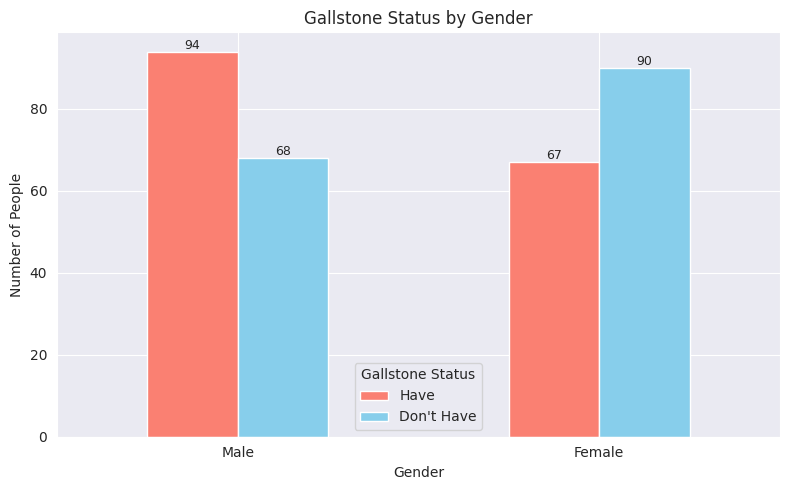

In [130]:
# Group and pivot the data
grouped = data.groupby(["Gender", "Gallstone Status"]).size().unstack(fill_value=0)

# Ensure correct column order: 0 = Have, 1 = Don't Have
grouped = grouped[[0, 1]]
grouped.columns = ["Have", "Don't Have"]

# Plot
ax = grouped.plot(kind='bar', stacked=False, color=["salmon", "skyblue"], figsize=(8, 5))

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

# Set titles and labels
plt.title("Gallstone Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.legend(title="Gallstone Status")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"], rotation=0)
plt.tight_layout()

plt.show()


This grouped bar chart compares the prevalence of gallstones between males and females, revealing a notable difference between the two groups. The data shows that a higher proportion of males have gallstones than do not (94 vs. 68). Conversely, a majority of females in this dataset do not have gallstones (90 vs. 67). This suggests that within this particular patient cohort, gender appears to be a significant differentiating factor for gallstone status.

### Gallstone Status Distribution by Age Group

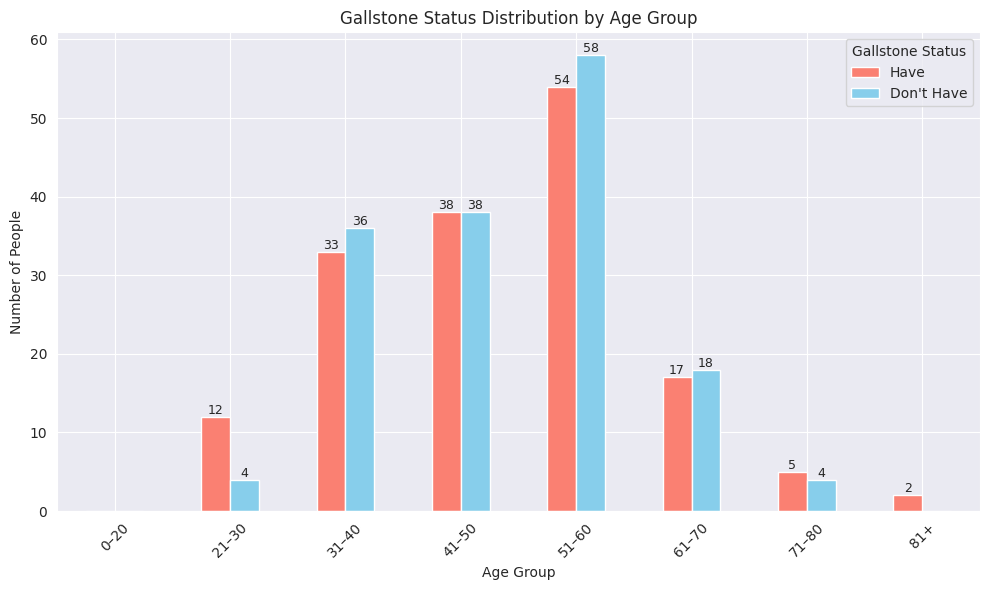

In [131]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

grouped = data.groupby(['AgeGroup', 'Gallstone Status'], observed=False).size().unstack(fill_value=0)

grouped = grouped[[0, 1]]
grouped.columns = ['Have', "Don't Have"]

ax = grouped.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'], figsize=(10, 6))

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(str(int(height)),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

plt.title("Gallstone Status Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.legend(title="Gallstone Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This chart breaks down gallstone status by age, confirming that the highest number of cases (both with and without gallstones) occurs in the middle-age brackets from 31 to 60 years old. The key insight is the remarkable balance between the two outcomes in these central groups; for instance, the 41-50 age bracket shows a perfect 38/38 split. While the younger group (21-30) shows a higher prevalence of patients with gallstones, the risk appears surprisingly even throughout the most represented adult years in this cohort.

### Gallstone Status by Comorbidity Count

In [132]:
data["Comorbidity"].value_counts()

Comorbidity
0    217
1     99
3      2
2      1
Name: count, dtype: int64

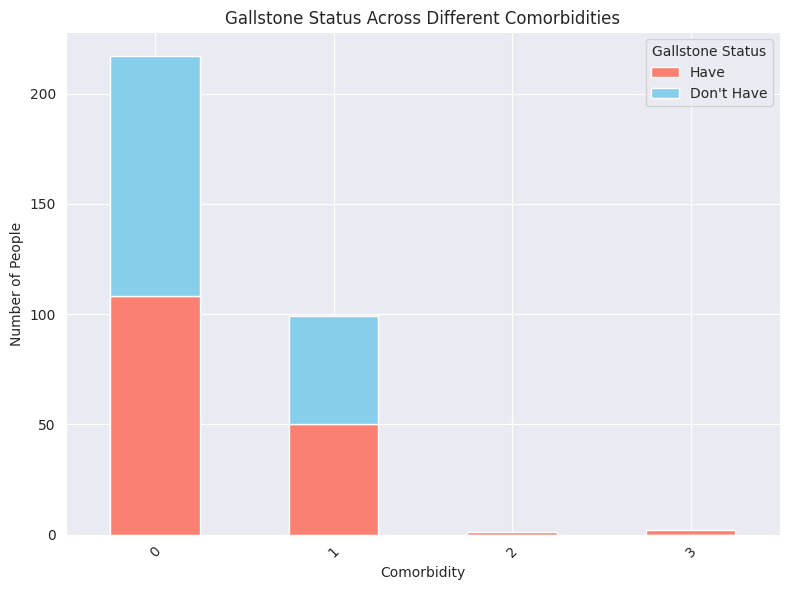

In [133]:
grouped = data.groupby(['Comorbidity', 'Gallstone Status']).size().unstack(fill_value=0)
grouped = grouped[[0, 1]]
grouped.columns = ['Have', "Don't Have"]

ax = grouped.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 6))

plt.title("Gallstone Status Across Different Comorbidities")
plt.xlabel("Comorbidity")
plt.ylabel("Number of People")
plt.legend(title="Gallstone Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This chart shows the link between gallstone status and the number of other health conditions (comorbidities) a patient has. For patients with zero or one comorbidity—who make up the vast majority of the dataset—the distribution of having gallstones versus not having them is almost perfectly even. Interestingly, the very few patients with two or three comorbidities almost all have gallstones. This suggests that while a single comorbidity doesn't seem to affect the odds, having multiple health issues may be strongly associated with gallstone presence, although the small sample size for these latter groups calls for a cautious interpretation.

In [134]:
percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
percentage.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(10, 6))

plt.title("Percentage of Gallstone Status by Comorbidity")
plt.ylabel("Percentage")
plt.xlabel("Comorbidity")
plt.legend(title="Gallstone Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This 100% stacked bar chart powerfully visualizes the *risk* of having gallstones relative to the number of comorbidities. It clearly shows that for patients with **zero or one comorbidity**, the probability of having gallstones is exactly **50%**. In stark contrast, for every single patient in this dataset with **two or three comorbidities**, the probability jumps to **100%**. While this makes having multiple comorbidities a seemingly perfect predictor, this finding should be viewed with caution given the very small number of patients in these latter groups.

### Age Distribution by Gallstone Status and Comorbidity

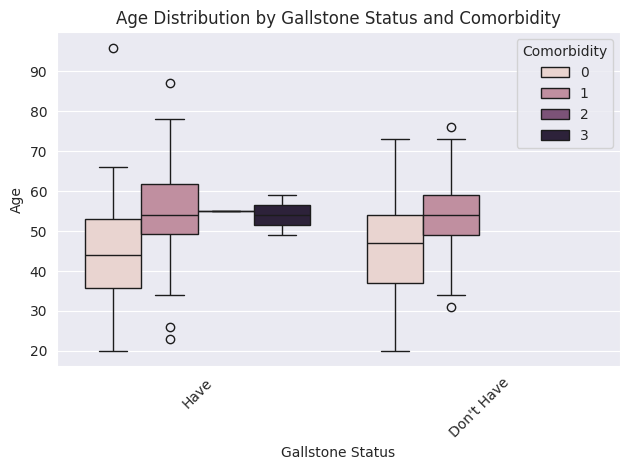

In [135]:
sns.boxplot(data=data, x='Gallstone Status', y='Age', hue='Comorbidity')
plt.title("Age Distribution by Gallstone Status and Comorbidity")
plt.xlabel("Gallstone Status")
plt.ylabel("Age")
plt.xticks(rotation=45, ticks = [0, 1], labels = ["Have", "Don't Have"])
plt.tight_layout()
plt.show()

This box plot provides a detailed view of how age is distributed across different gallstone and comorbidity groups. A key observation is that patients with one or more comorbidities have a consistently higher median age (around 55 years) compared to those with no comorbidities, regardless of their gallstone status. The plot also visually confirms a critical finding from previous charts: there are no patients in the 'Don't Have' gallstones category who have two or more comorbidities, reinforcing the strong link between having multiple health issues and the presence of gallstones within this cohort.

### Proportion of Gallstone Status by Comorbidity

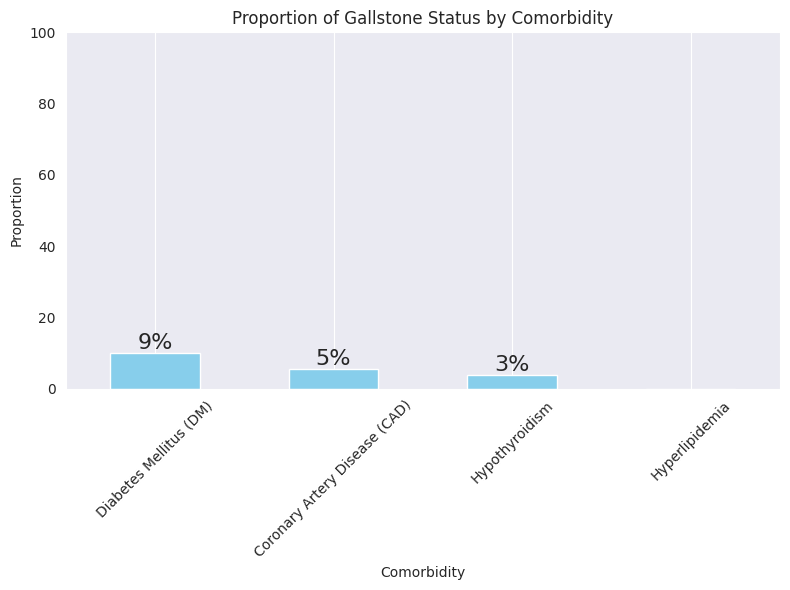

In [136]:
gallstone_positive = data[data["Gallstone Status"] == 0]
custom_list = ["Diabetes Mellitus (DM)", "Coronary Artery Disease (CAD)", "Hypothyroidism", "Hyperlipidemia"]

proportions = gallstone_positive[custom_list].mean().apply(lambda x: x * 100)

plt.figure(figsize = (8,6))
ax = proportions.plot(kind = "bar", color = "skyblue")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=16)

plt.title('Proportion of Gallstone Status by Comorbidity')
plt.xlabel("Comorbidity")
plt.ylabel("Proportion")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()


This bar chart shows the overall prevalence of specific comorbidities within the entire patient population. The most common of these conditions is **Diabetes Mellitus (DM)**, present in **9%** of the patients. This is followed by **Coronary Artery Disease (CAD)** at **5%** and **Hypothyroidism** at **3%**. Notably, **Hyperlipidemia** is listed on the axis but has no corresponding bar, indicating its prevalence in this dataset is either zero or negligible.

### Proportion of Comorbidity by Gallstone Status

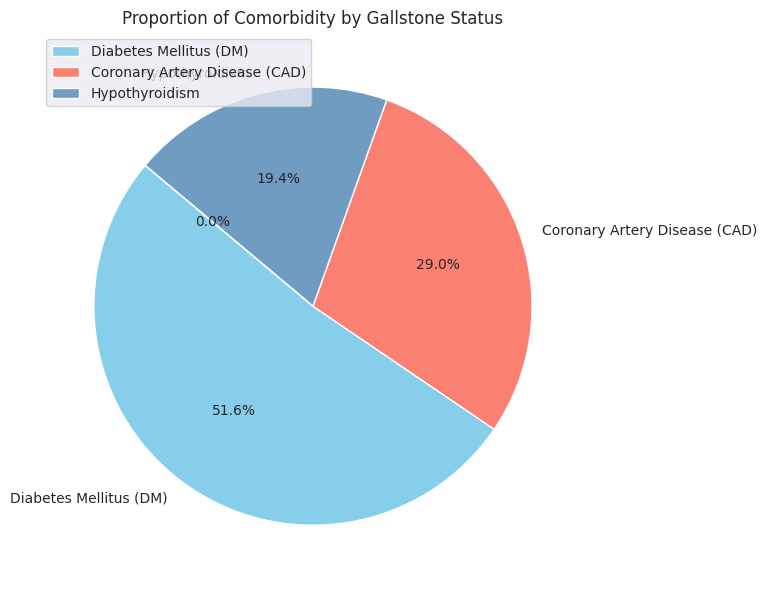

In [137]:
gallstone_positive = data[data["Gallstone Status"] == 0]
custom_list = ["Diabetes Mellitus (DM)", "Coronary Artery Disease (CAD)", "Hypothyroidism", "Hyperlipidemia"]

proportions = gallstone_positive[custom_list].mean().apply(lambda x: x * 100)

plt.figure(figsize = (8,6))
ax = proportions.plot(kind = "pie", labels = proportions.index, autopct = '%1.1f%%',
                      startangle = 140, colors = ['skyblue', 'salmon', '#709bc2', '#acc0d2'])

plt.title('Proportion of Comorbidity by Gallstone Status')
plt.grid(axis = 'y')
plt.tight_layout()
plt.legend()
plt.show()


This pie chart illustrates the proportional makeup of specific health issues *exclusively among the patients who have at least one comorbidity*. It highlights that **Diabetes Mellitus (DM)** is the most dominant condition, comprising **51.6%** of all reported comorbidities in this subgroup. **Coronary Artery Disease (CAD)** is the second most common, accounting for **29.0%**, while **Hypothyroidism** makes up the remaining **19.4%**. This view effectively shows the relative contribution of each disease to the total burden of comorbidity.

### BMI Distribution by Gallstone Status and Comorbidity

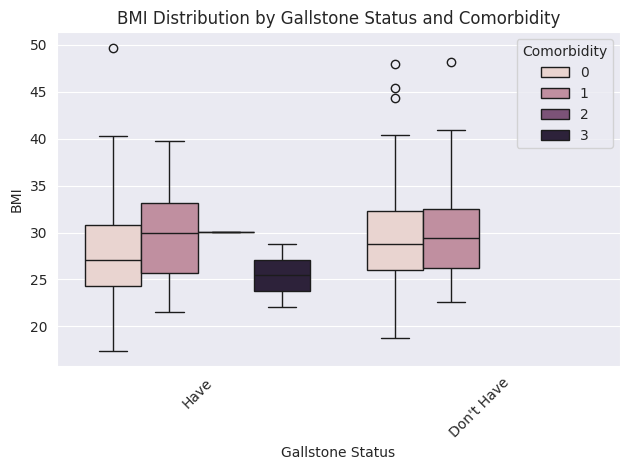

In [138]:
sns.boxplot(data=data, x='Gallstone Status', y='Body Mass Index (BMI)', hue='Comorbidity')
plt.title("BMI Distribution by Gallstone Status and Comorbidity")
plt.xlabel("Gallstone Status")
plt.ylabel("BMI")
plt.xticks(rotation=45, ticks = [0, 1], labels = ["Have", "Don't Have"])
plt.tight_layout()
plt.show()

This box plot examines the distribution of **Body Mass Index (BMI)** across gallstone status and comorbidity levels. The most notable takeaway is the similarity in BMI among the largest patient groups; for those with **zero or one comorbidity**, the median BMI consistently hovers around **28-30** (in the overweight/obese range) regardless of whether they have gallstones or not. The plot also visually confirms that patients with two or more comorbidities only appear in the 'Have' gallstones category. This suggests that while a higher BMI is prevalent throughout this cohort, it does not appear to be a strong *differentiating* factor for gallstones in this specific dataset.

### TBFR Distribution by Gallstone Status and Comorbidity

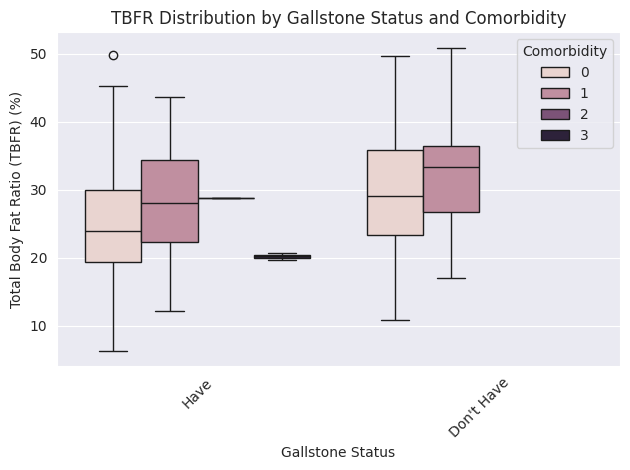

In [139]:
sns.boxplot(data=data, x='Gallstone Status', y='Total Body Fat Ratio (TBFR) (%)', hue='Comorbidity')
plt.title("TBFR Distribution by Gallstone Status and Comorbidity")
plt.xlabel("Gallstone Status")
plt.ylabel("Total Body Fat Ratio (TBFR) (%)")
plt.xticks(rotation=45, ticks = [0, 1], labels = ["Have", "Don't Have"])
plt.tight_layout()
plt.show()

This box plot analyzes the distribution of **Total Body Fat Ratio (TBFR)** across gallstone and comorbidity groups, revealing an interesting pattern. For patients with **no comorbidities**, those *without* gallstones surprisingly have a notably higher median body fat ratio (around 28%) than those *with* gallstones (around 23%). A similar, though less pronounced, trend is visible for patients with **one comorbidity**. This suggests that while the presence of a comorbidity is linked to higher body fat in general, a higher TBFR on its own is not a clear indicator of having gallstones in this specific dataset.

### VFR Distribution by Gallstone Status and Comorbidity

In [140]:
sns.boxplot(data=data, x='Gallstone Status', y = 'Visceral Fat Rating (VFR)', hue='Comorbidity')
plt.title("VFR Distribution by Gallstone Status and Comorbidity")
plt.xlabel("Gallstone Status")
plt.ylabel("Visceral Fat Rating (VFR)")
plt.xticks(rotation=45, ticks = [0, 1], labels = ["Have", "Don't Have"])
plt.tight_layout()
plt.show()

This box plot analyzes the distribution of Visceral Fat Rating (VFR), a measure of metabolically active fat around the organs. Unlike the previous body composition charts, a clearer pattern emerges here. For patients with both zero and one comorbidity, the median VFR is consistently higher in the group that has gallstones. This suggests that higher levels of visceral fat, more so than general body fat or BMI, appear to be more directly associated with the presence of gallstones in this patient cohort, making VFR a potentially significant factor.

### BMI Distribution by Gallstone Status

In [142]:
gallstone_positive_bmi = data[data["Gallstone Status"] == 0]
gallstone_negative_bmi = data[data["Gallstone Status"] == 1]

bins = [0, 18.5, 24.9, 29.9, 34.9, 49.7]
labels = ["Underweight", "Normal", "Overweight", "Obseity 1", "Obesity 2+"]

positive_bmi = pd.cut(gallstone_positive_bmi["Body Mass Index (BMI)"], bins = bins, labels = labels, right = False)
negative_bmi = pd.cut(gallstone_negative_bmi["Body Mass Index (BMI)"], bins = bins, labels = labels, right = False)

pos_counts = positive_bmi.value_counts().sort_index()
neg_counts = negative_bmi.value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(pos_counts.index, pos_counts.values, 'r-o', label='Gallstone Positive')
ax1.set_ylabel('Gallstone Positive Count', color='r')
ax1.tick_params(axis='y', colors='r')

ax2.plot(neg_counts.index, neg_counts.values, 'b-o', label='Gallstone Negative')
ax2.set_ylabel('Gallstone Negative Count', color='b')
ax2.tick_params(axis='y', colors='b')

ax1.set_xlabel('BMI Category')
ax1.set_title('BMI Distribution by Gallstone Status')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.tight_layout()
plt.show()


plt.show()

This dual-axis line chart compares the number of patients with (red) and without (blue) gallstones across standard BMI categories. Both groups show a similar distribution, with the absolute number of patients for both outcomes peaking sharply in the **'Overweight'** category. However, the chart reveals a crucial difference in prevalence: in the **'Normal'** weight range, more patients have gallstones than do not. Conversely, for both the **'Overweight'** and **'Obese 1'** categories, a greater number of patients are gallstone-negative, suggesting that the relative risk is not uniform across the BMI spectrum in this cohort.

### Body Mass Index by Gallstone Status

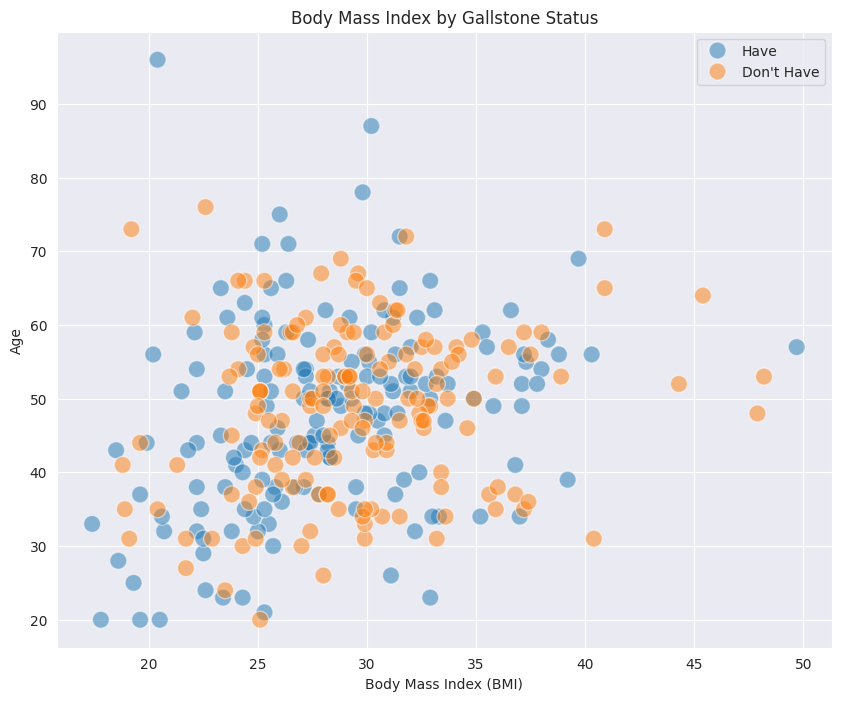

In [143]:
plt.figure(figsize=(10,8))
plot = sns.scatterplot(
    x='Body Mass Index (BMI)',
    y='Age',
    hue='Gallstone Status',
    data=data,
    alpha=0.5,
    s=150
)

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Age')
plt.title('Body Mass Index by Gallstone Status')


legend_labels = {0: "Have", 1: "Don't Have"}
handles, labels = plot.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plot.legend(handles=handles, labels=new_labels)

plt.show()


This scatter plot maps each patient based on their **Age** and **Body Mass Index (BMI)**, color-coded by their gallstone status ('Have' in orange, 'Don't Have' in blue). The most significant finding is the extensive overlap between the two groups. There are no distinct clusters or clear boundaries that separate patients with and without gallstones based on these two factors alone. This visual evidence strongly suggests that while Age and BMI are important variables, their combined effect is not sufficient to easily distinguish between the two outcomes, highlighting the complex nature of the condition.

### BMI Distribution by Gallstone Status

In [144]:
plt.figure(figsize=(6,5))
sns.violinplot(
    data = data,
    hue='Gallstone Status',
    y='Body Mass Index (BMI)',
    inner='box',
    palette='Set2',
    legend = True
)
plt.title('BMI Distribution by Gallstone Status')
plt.show()

This violin plot compares the **Body Mass Index (BMI) distribution** for patients with gallstones (Group 0) and without (Group 1). The plot's most striking feature is the near-identical nature of the two distributions. Both groups exhibit a very similar median BMI (around 28), a similar interquartile range, and an almost identical shape, with the highest density of patients falling in the 'overweight' category. This visual evidence strongly suggests that, within this dataset, a patient's BMI profile is not a strong differentiating factor for their gallstone status.

### VFR vs HFA via Gallstone Status

In [145]:
plt.figure(figsize=(10,8))
plot = sns.scatterplot(
    x='Visceral Fat Rating (VFR)',
    y='Hepatic Fat Accumulation (HFA)',
    hue='Gallstone Status',
    data=data,
    alpha=0.5,
    s=150
)

plt.xlabel('Visceral Fat Rating (VFR)')
plt.ylabel('Hepatic Fat Accumulation (HFA)')
plt.title('VFR vs HFA via Gallstone Status')

legend_labels = {0: "Have", 1: "Don't Have"}
handles, labels = plot.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plot.legend(handles=handles, labels=new_labels)

plt.show()


This scatter plot investigates the relationship between **Visceral Fat Rating (VFR)** and **Hepatic Fat Accumulation (HFA)**, with points colored by gallstone status. The most apparent takeaway is the profound overlap between patients who have gallstones (blue) and those who do not (orange). Across all measured levels of both visceral and liver fat, the two groups are heavily intermingled, and no distinct pattern or separable boundary emerges. This indicates that even when combining these two specific metrics for internal fat, there isn't a simple relationship that can reliably differentiate between patients with and without gallstones in this cohort.

### BMI vs Triglyceride via Gallstone Status

In [146]:
plt.figure(figsize=(10,8))
plot = sns.scatterplot(
    x= 'Body Mass Index (BMI)',
    y='Triglyceride',
    hue='Gallstone Status',
    data=data,
    alpha=0.5,
    s=150
)

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Triglyceride')
plt.title('BMI vs Triglyceride via Gallstone Status')

legend_labels = {0: "Have", 1: "Don't Have"}
handles, labels = plot.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plot.legend(handles=handles, labels=new_labels)

plt.show()


This scatter plot maps patients according to their **Body Mass Index (BMI)** and **Triglyceride** levels, with colors indicating their gallstone status. The plot's primary takeaway is the significant and thorough overlap between patients who have gallstones (blue) and those who do not (orange). There is no discernible pattern or boundary that effectively separates the two groups based on these two metabolic markers. This demonstrates that a simple combination of BMI and triglyceride levels is insufficient to clearly differentiate between the two outcomes in this cohort.

### Age vs Total Cholesterol (TC) via Gallstone Status

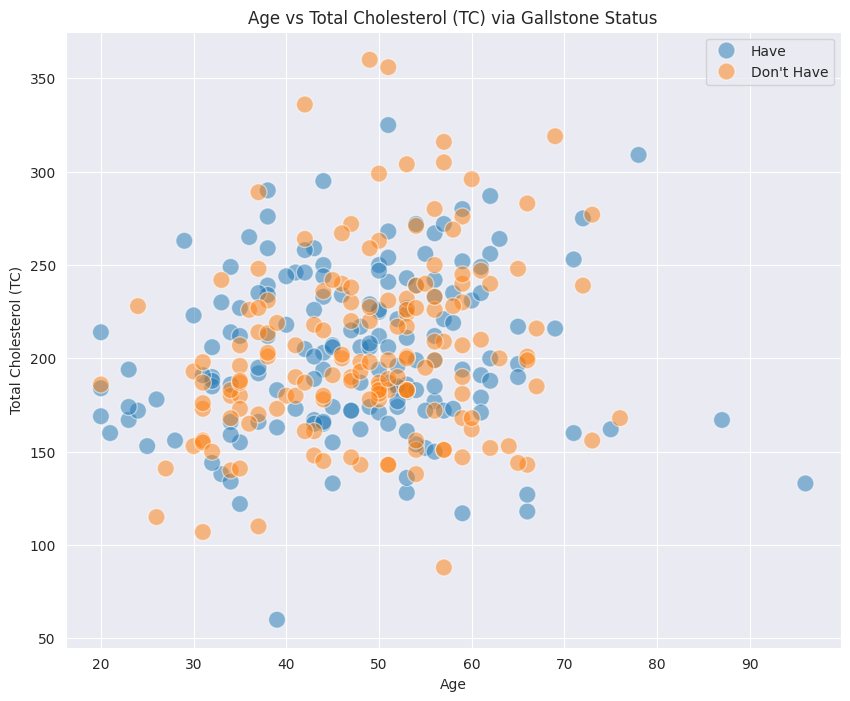

In [147]:
plt.figure(figsize=(10,8))
plot = sns.scatterplot(
    x= 'Age',
    y='Total Cholesterol (TC)',
    hue='Gallstone Status',
    data=data,
    alpha=0.5,
    s=150
)

plt.xlabel('Age')
plt.ylabel("Total Cholesterol (TC)")
plt.title('Age vs Total Cholesterol (TC) via Gallstone Status')

legend_labels = {0: "Have", 1: "Don't Have"}
handles, labels = plot.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plot.legend(handles=handles, labels=new_labels)

plt.show()


This scatter plot visualizes patient data based on their **Age** and **Total Cholesterol (TC)** levels, color-coded by gallstone status. The primary conclusion drawn from this chart is the complete and extensive overlap between patients who have gallstones (blue) and those who do not (orange). There is no discernible pattern, trend, or boundary that separates the two groups, indicating that a combination of age and total cholesterol is not, by itself, a sufficient predictor for gallstone status in this dataset.

### Given vs Approximate Degree of Obesity

In [148]:
data["Obesity (%)"].max()

np.float64(1954.0)

In [149]:
data[data["Obesity (%)"] == 1954.0]

Gallstone Status  Age  Gender  Comorbidity  \
239                 1   51       1            1   

     Coronary Artery Disease (CAD)  Hypothyroidism  Hyperlipidemia  \
239                              0               0               0   

     Diabetes Mellitus (DM)  Height  Weight  ...  Triglyceride  \
239                       1     150    65.9  ...         138.0   

     Aspartat Aminotransferaz (AST)  Alanin Aminotransferaz (ALT)  \
239                            28.0                          30.0   

     Alkaline Phosphatase (ALP)  Creatinine  Glomerular Filtration Rate (GFR)  \
239                        65.0        0.75                             96.33   

     C-Reactive Protein (CRP)  Hemoglobin (HGB)  Vitamin D  AgeGroup  
239                       1.1              14.3        5.8     51–60  

[1 rows x 40 columns]

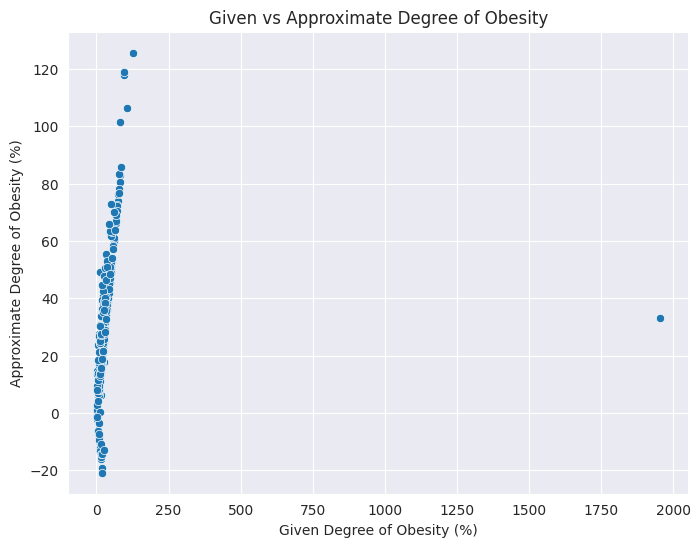

Correlation: 0.1814
Mean Absolute Error: 10.8762


In [150]:
def approx_degree_of_obesity(df):
    height_m = df['Height'] / 100
    standard_weight = 22 * (height_m ** 2)  # Approximate ideal weight

    degree_of_obesity = ((df['Weight'] - standard_weight) / standard_weight) * 100
    return degree_of_obesity

# Add to dataframe and compare with given
data['Approx_Degree_of_Obesity'] = approx_degree_of_obesity(data)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Obesity (%)', y='Approx_Degree_of_Obesity', data=data)
plt.xlabel('Given Degree of Obesity (%)')
plt.ylabel('Approximate Degree of Obesity (%)')
plt.title('Given vs Approximate Degree of Obesity')
plt.show()

# Correlation and MAE
corr = data['Obesity (%)'].corr(data['Approx_Degree_of_Obesity'])
mae = (data['Obesity (%)'] - data['Approx_Degree_of_Obesity']).abs().mean()
print(f"Correlation: {corr:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


This scatter plot compares two measurements of obesity, revealing a very strong linear correlation for almost all data points, which cluster tightly near the origin. However, the chart is completely dominated by a **single, extreme outlier** on the x-axis, which has a "Given Degree of Obesity" value of nearly 2000% while its "Approximate" value is a more plausible ~35%.

## Height vs Weight

In [151]:
cols = ["Height", "Weight", "Body Mass Index (BMI)", "Total Body Water (TBW)", "Extracellular Water (ECW)", "Intracellular Water (ICW)"
        , "Extracellular Fluid/Total Body Water (ECF/TBW)", "Total Body Fat Ratio (TBFR) (%)", "Lean Mass (LM) (%)", "Body Protein Content (Protein) (%)",
        "Visceral Fat Rating (VFR)", "Bone Mass (BM)", "Muscle Mass (MM)", "Obesity (%)", "Total Fat Content (TFC)",
        "Visceral Fat Area (VFA)", "Visceral Muscle Area (VMA) (Kg)", "Hepatic Fat Accumulation (HFA)"]

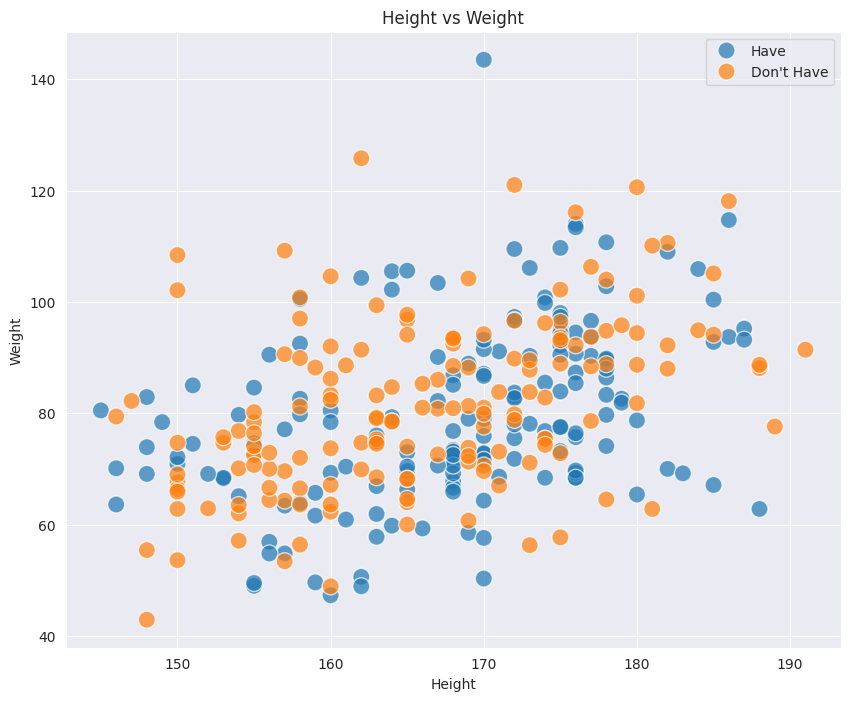

In [152]:
plt.figure(figsize=(10,8))
plot = sns.scatterplot(x = "Height", y = "Weight", data = data, hue = "Gallstone Status", alpha = 0.7, s = 150)
legend_labels = {0: "Have", 1: "Don't Have"}
handles, labels = plot.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plot.legend(handles=handles, labels=new_labels)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height vs Weight")
plt.show()

This scatter plot maps patients by their **Height** and **Weight**, with colors indicating their gallstone status. While the chart shows the expected positive correlation between height and weight, its most important finding is the **complete and thorough overlap** between patients who have gallstones (blue) and those who do not (orange). The two groups are entirely intermingled across the full data distribution, indicating that this fundamental relationship between height and weight does not, by itself, help differentiate between the two patient outcomes.

### Distribution of Key Body Fat Metrics

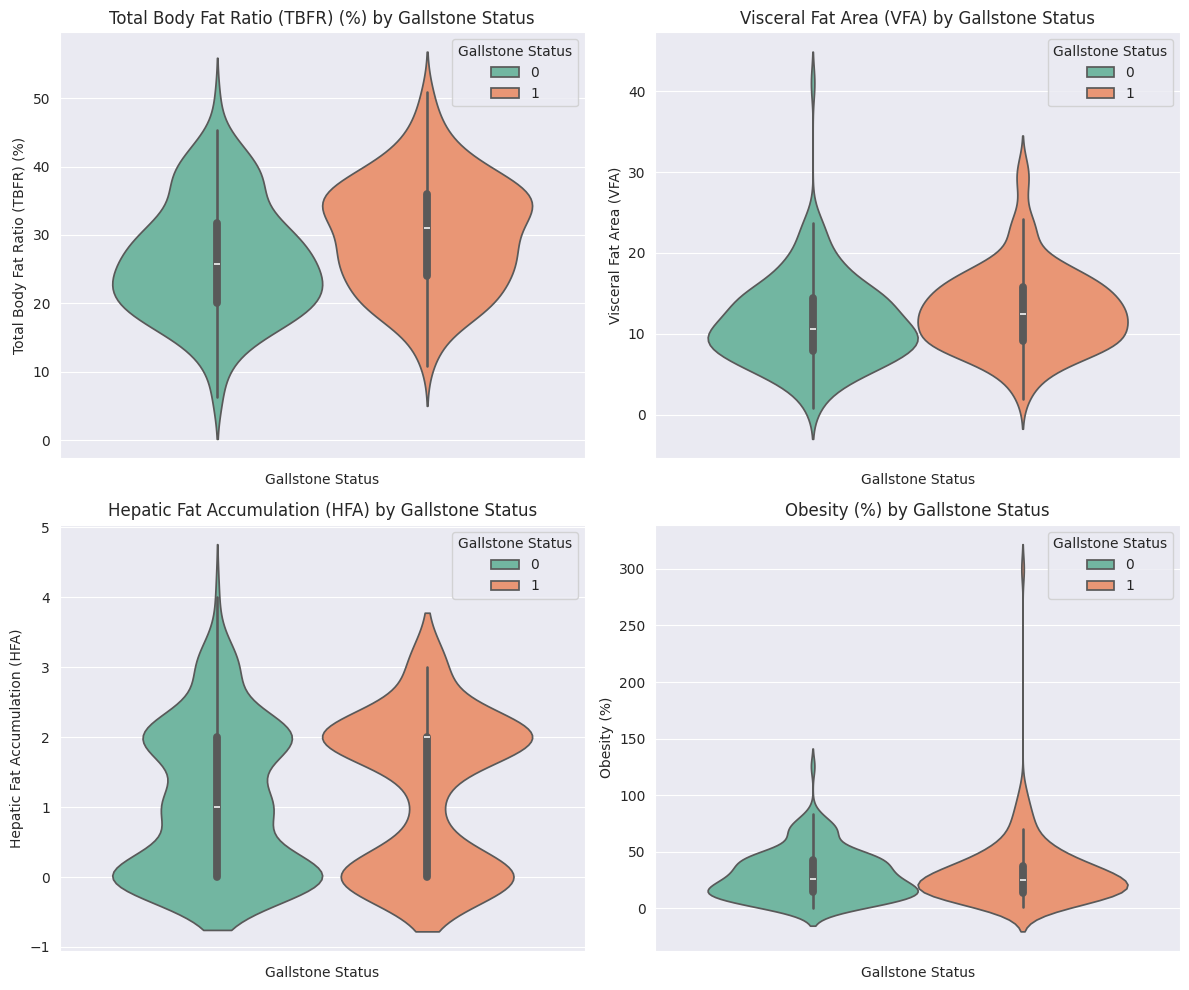

In [153]:
data["Obesity (%)"] = data["Obesity (%)"].clip(0, 300)

features = [
    "Total Body Fat Ratio (TBFR) (%)",
    "Visceral Fat Area (VFA)",
    "Hepatic Fat Accumulation (HFA)",
    "Obesity (%)"
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.violinplot(
        data=data,
        hue='Gallstone Status',   # Replace with your gallstone status column name
        y=feature,
        inner='box',
        palette='Set2',
        ax=axes[i],
        legend = True
    )
    axes[i].set_title(f"{feature} by Gallstone Status", fontsize=12)
    axes[i].set_xlabel("Gallstone Status")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


This grid of violin plots compares four fat-related metrics between patients with gallstones (Group 0, green) and without (Group 1, orange). The charts reveal a crucial distinction: while metrics of general fat like **Total Body Fat Ratio (TBFR)** and **Obesity (%)** are surprisingly higher for patients *without* gallstones, the measures of internal, metabolically active fat—**Visceral Fat Area (VFA)** and **Hepatic Fat Accumulation (HFA)**—are consistently higher for patients *with* gallstones. This strongly suggests that the specific **location of fat** (i.e., visceral and liver fat) is a more important indicator of gallstone presence than overall body fat percentage in this cohort.

### Ranking Important feature

/tmp/ipykernel_10435/3742748384.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


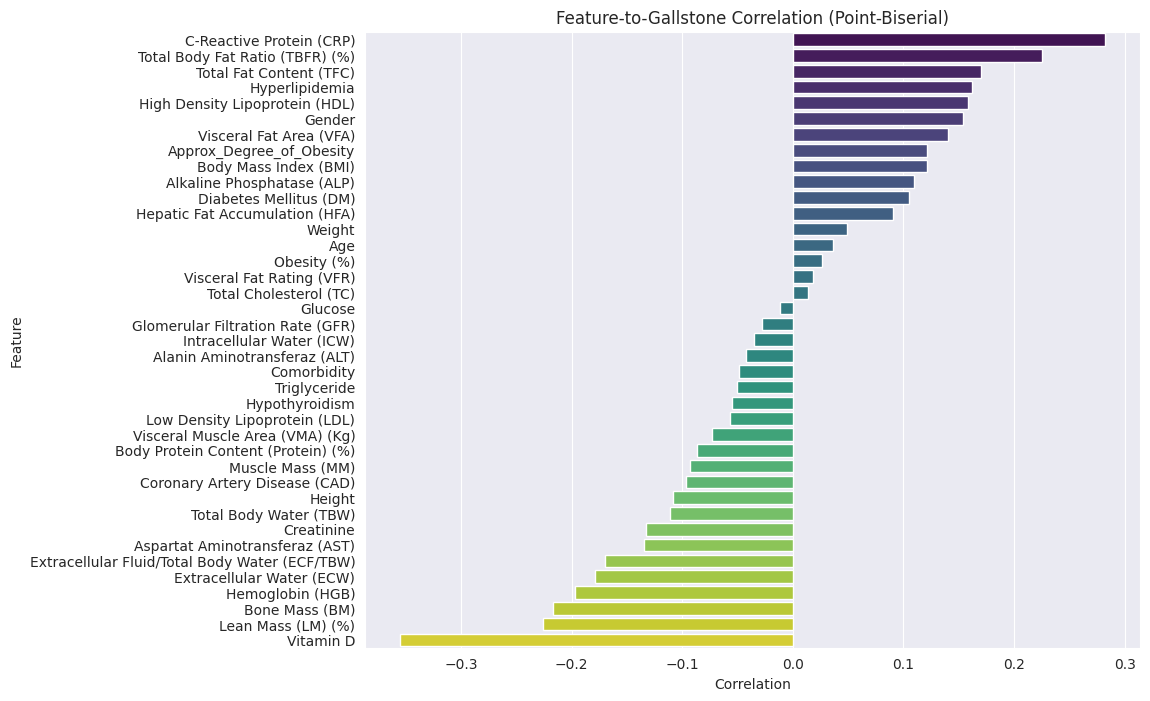

In [154]:
from scipy.stats import pointbiserialr

df = data.copy()

corr_matrix = df.drop(columns=['Gallstone Status' , "AgeGroup"]).corr()

binary_corr = {}
for col in df.columns:
    if col != 'Gallstone Status' and pd.api.types.is_numeric_dtype(df[col]):
        corr, _ = pointbiserialr(df['Gallstone Status'], df[col])
        binary_corr[col] = corr

binary_corr_df = pd.DataFrame.from_dict(binary_corr, orient='index', columns=['Correlation with Gallstone'])
binary_corr_df = binary_corr_df.sort_values(by='Correlation with Gallstone', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=binary_corr_df.reset_index(),
    x='Correlation with Gallstone',
    y='index',
    palette='viridis'
)
plt.title("Feature-to-Gallstone Correlation (Point-Biserial)")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


This bar chart ranks each feature by its linear correlation to the `Gallstone Status` target, effectively summarizing the most significant individual risk and protective factors. The feature with the strongest negative correlation (a potential risk factor) is **Vitamin D**, followed by measures like **Lean Mass (LM)**. Conversely, **C-Reactive Protein (CRP)** shows the strongest positive correlation (a potential protective factor), followed by **Total Body Fat Ratio (TBFR)** and **HDL**. Importantly, all correlations are weak to moderate, indicating that no single feature is a dominant predictor on its own and that a combination of factors will be necessary for a robust model.

### Pair Plot Analysis of Top Features

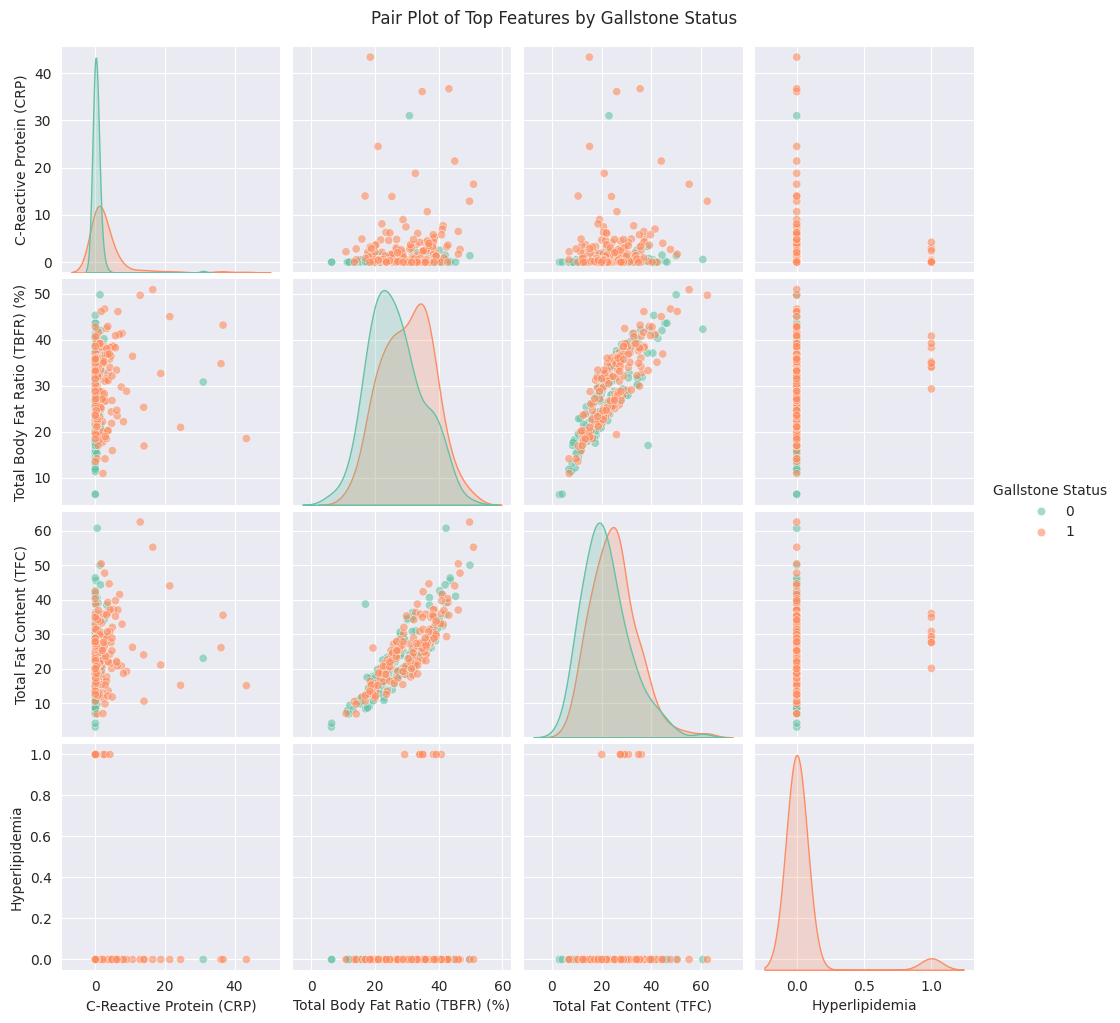

In [155]:
top_features = [
    "C-Reactive Protein (CRP)",
    "Total Body Fat Ratio (TBFR) (%)",
    "Total Fat Content (TFC)",
    "Hyperlipidemia"
]

sns.pairplot(
    data[top_features + ['Gallstone Status']],
    hue='Gallstone Status',
    diag_kind='kde',
    palette='Set2',
    plot_kws={'alpha': 0.6}
)
plt.suptitle("Pair Plot of Top Features by Gallstone Status", y=1.02)
plt.show()


This pair plot examines the relationships between four top-performing features: **CRP, TBFR, TFC, and Hyperlipidemia**. The diagonal density plots clearly visualize the differences in their distributions, confirming that patients *without* gallstones (orange, Status 1) tend to have higher levels across these specific metrics. A key finding is that **Hyperlipidemia** is exclusively present in the gallstone-negative group. The off-diagonal scatter plots show a near-perfect linear correlation between **TBFR** and **TFC**, indicating they are largely redundant, while other pairwise comparisons show significant overlap between the two patient groups.

### Gallstone Prevalence vs Visceral Fat Area (VFA)

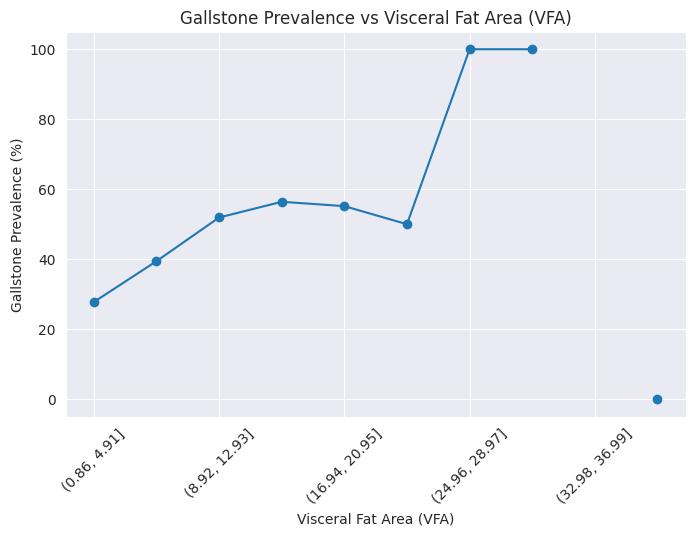

In [156]:
metric = "Visceral Fat Area (VFA)"

data['Metric_Bin'] = pd.cut(data[metric], bins=10)

prevalence = data.groupby('Metric_Bin', observed = False)['Gallstone Status'].mean() * 100

plt.figure(figsize=(8,5))
prevalence.plot(kind='line', marker='o')
plt.title(f"Gallstone Prevalence vs {metric}")
plt.xlabel(metric)
plt.ylabel("Gallstone Prevalence (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

data.drop(columns=['Metric_Bin'], inplace=True)


This line chart clearly illustrates a strong positive relationship between **Visceral Fat Area (VFA)** and the prevalence of gallstones. As VFA increases, the likelihood of having gallstones trends upwards, rising from under 30% in the lowest VFA group and jumping dramatically to **100%** for patients in the higher VFA ranges (above a VFA of ~25). This suggests that VFA is a significant risk factor. The final data point showing a sudden drop to 0% prevalence is likely an anomaly caused by a very small number of patients in that specific high-VFA bin.

### Gallstone Prevalence vs Obesity (%)

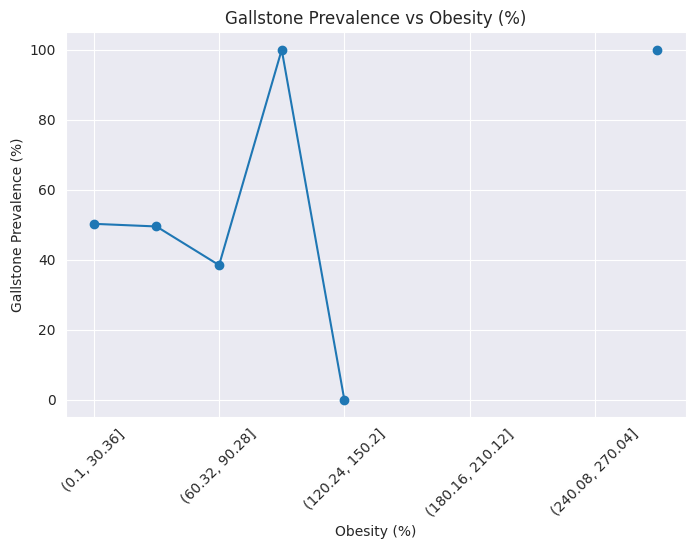

In [157]:
metric = "Obesity (%)"

data['Metric_Bin'] = pd.cut(data[metric], bins=10)

prevalence = data.groupby('Metric_Bin', observed = False)['Gallstone Status'].mean() * 100

plt.figure(figsize=(8,5))
prevalence.plot(kind='line', marker='o')
plt.title(f"Gallstone Prevalence vs {metric}")
plt.xlabel(metric)
plt.ylabel("Gallstone Prevalence (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

data.drop(columns=['Metric_Bin'], inplace=True)


This line chart plots gallstone prevalence against different bins of the 'Obesity (%)' metric, revealing a highly erratic and unstable pattern. The prevalence swings dramatically from a baseline of around 40-50% to **100%** in one bin, before plummeting to **0%** in the next. This extreme volatility is a strong indicator that the number of patients within each of these bins is very small, making the calculated prevalence highly sensitive to just one or two individuals. Therefore, this chart does not likely represent a reliable underlying trend and should be interpreted with extreme caution.

### Analysis of Biochemical Markers

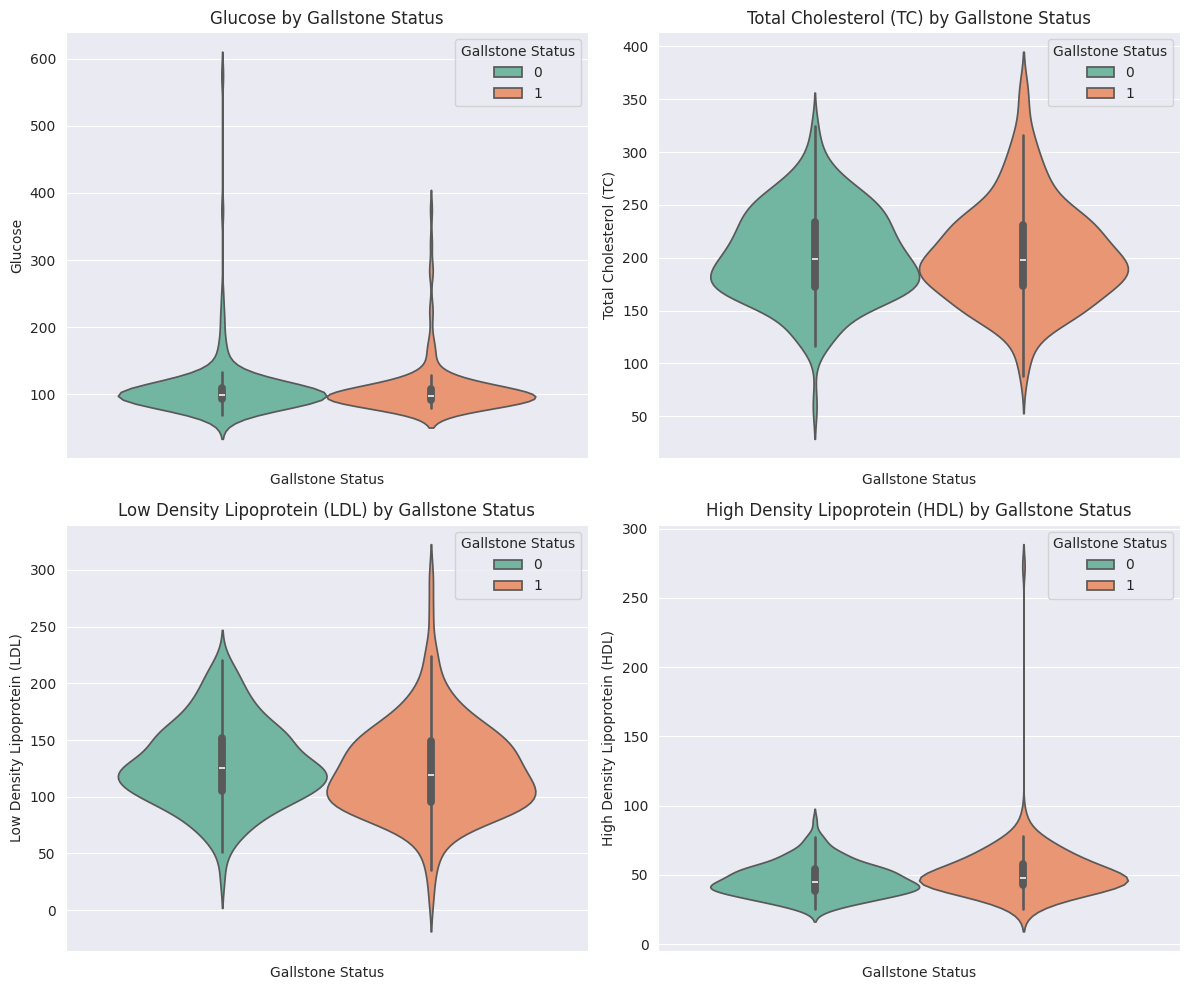

In [158]:
features_group1 = [
    "Glucose",
    "Total Cholesterol (TC)",
    "Low Density Lipoprotein (LDL)",
    "High Density Lipoprotein (HDL)"
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features_group1):
    sns.violinplot(
        data=data,
        hue='Gallstone Status',
        y=feature,
        inner='box',
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} by Gallstone Status", fontsize=12)
    axes[i].set_xlabel("Gallstone Status")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

This grid of violin plots compares key biochemical markers between patients with gallstones (Group 0, green) and without (Group 1, orange). A clear pattern emerges in the lipid profiles: patients with gallstones tend to have higher median levels of Total Cholesterol (TC) and LDL ('bad' cholesterol). In contrast, patients without gallstones show a distinctly higher median level of HDL ('good' cholesterol). The Glucose distributions appear largely similar between the two groups, aside from numerous outliers. These results strongly suggest that an adverse lipid profile is associated with gallstone presence in this cohort.

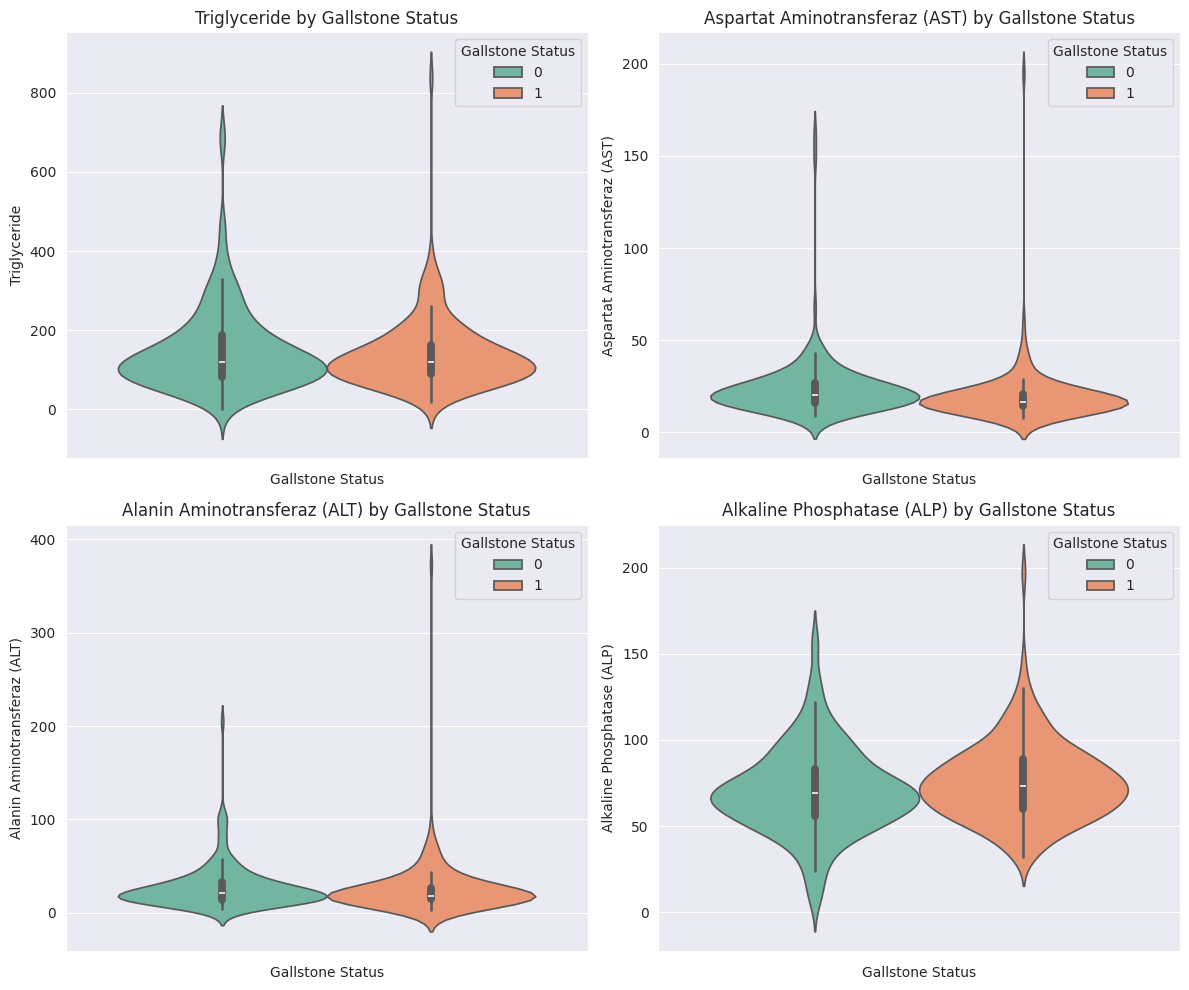

In [159]:
features_group2 = [
    "Triglyceride",
    "Aspartat Aminotransferaz (AST)",
    "Alanin Aminotransferaz (ALT)",
    "Alkaline Phosphatase (ALP)"
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features_group2):
    sns.violinplot(
        data=data,
        hue='Gallstone Status',
        y=feature,
        inner='box',
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} by Gallstone Status", fontsize=12)
    axes[i].set_xlabel("Gallstone Status")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

This set of violin plots examines the distributions of triglycerides and key liver enzymes by gallstone status. A clear and consistent trend is visible across all four metrics: patients **with gallstones** (Group 0, green) consistently show **higher median levels** of **Triglycerides**, **AST**, **ALT**, and **ALP** compared to those without gallstones. This uniform elevation strongly suggests a link between the presence of gallstones and altered liver function or metabolic stress, highlighting these as potentially significant indicators.

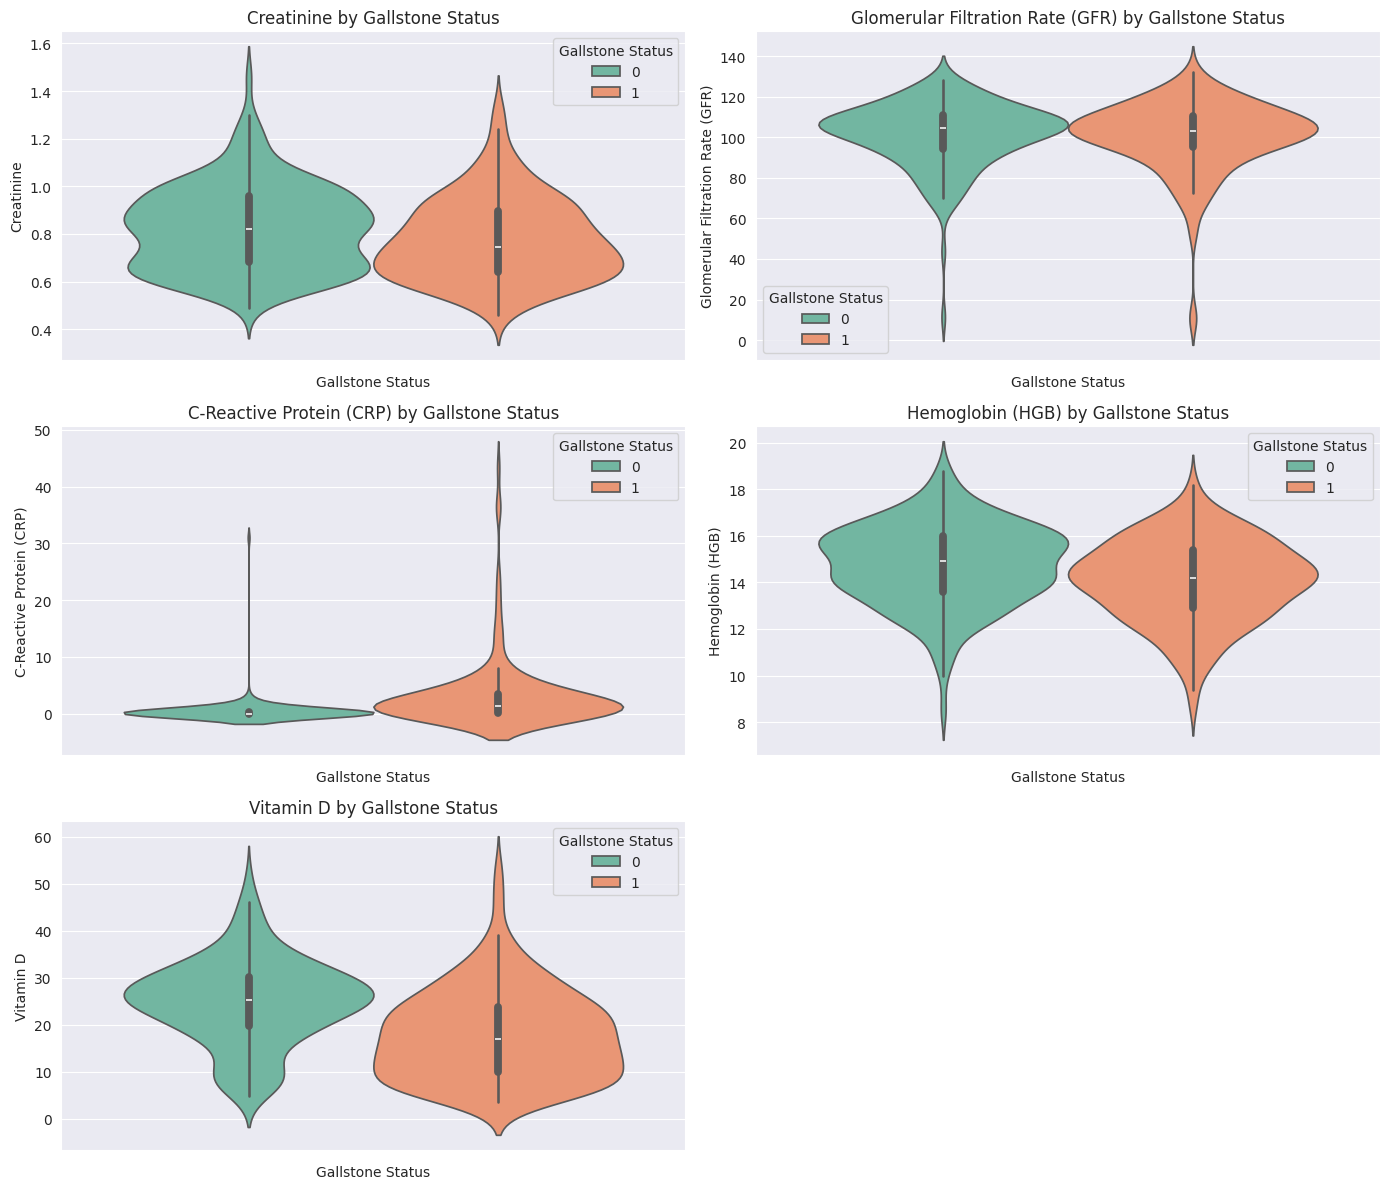

In [160]:
features_group3 = [
    "Creatinine",
    "Glomerular Filtration Rate (GFR)",
    "C-Reactive Protein (CRP)",
    "Hemoglobin (HGB)",
    "Vitamin D"
]

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, feature in enumerate(features_group3):
    sns.violinplot(
        data=data,
        hue='Gallstone Status',
        y=feature,
        inner='box',
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} by Gallstone Status", fontsize=12)
    axes[i].set_xlabel("Gallstone Status")
    axes[i].set_ylabel(feature)

# Remove the last empty subplot if exists
if len(features_group3) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

This series of plots compares various health markers, revealing distinct patterns. Measures of kidney function like **Creatinine** and **Glomerular Filtration Rate (GFR)** show nearly identical distributions for patients with and without gallstones. In contrast, clear differences emerge elsewhere: patients **without gallstones** (Group 1, orange) have significantly higher median levels of **C-Reactive Protein (CRP)** and **Vitamin D**. Additionally, **Hemoglobin (HGB)** levels are slightly lower in the gallstone-positive group. This suggests that while kidney function is not a differentiating factor, markers related to inflammation and vitamin levels are strongly associated with gallstone status in this cohort.

In [200]:
from scipy.stats import mannwhitneyu

df = data.copy()

features = [
    "Body Mass Index (BMI)", "Total Body Fat Ratio (TBFR) (%)", "Visceral Fat Area (VFA)",
    "Hepatic Fat Accumulation (HFA)", "Glucose", "Total Cholesterol (TC)", "Triglyceride",
    "Aspartat Aminotransferaz (AST)", "Alanin Aminotransferaz (ALT)", "Alkaline Phosphatase (ALP)", "Creatinine", "Glomerular Filtration Rate (GFR)",
    "C-Reactive Protein (CRP)", "Hemoglobin (HGB)", "Vitamin D"
]

results = []

for feature in features:
    group1 = df[df['Gallstone Status'] == 1][feature].dropna()
    group0 = df[df['Gallstone Status'] == 0][feature].dropna()
    stat, p = mannwhitneyu(group1, group0, alternative='two-sided')
    results.append((feature, stat, p))

# Convert to DataFrame and sort by p-value
import pandas as pd
results_df = pd.DataFrame(results, columns=['Feature', 'Statistic', 'p-value']).sort_values(by='p-value')

results_df


Feature  Statistic       p-value
12          C-Reactive Protein (CRP)    20125.5  1.764035e-20
14                         Vitamin D     7149.5  1.363600e-11
7     Aspartat Aminotransferaz (AST)     8469.5  2.379097e-07
1    Total Body Fat Ratio (TBFR) (%)    16062.0  4.941677e-05
13                  Hemoglobin (HGB)     9902.5  6.265234e-04
2            Visceral Fat Area (VFA)    15019.5  5.228238e-03
10                        Creatinine    10751.0  1.687089e-02
0              Body Mass Index (BMI)    14498.0  3.081331e-02
9         Alkaline Phosphatase (ALP)    14396.5  4.170153e-02
3     Hepatic Fat Accumulation (HFA)    14003.0  9.577265e-02
8       Alanin Aminotransferaz (ALT)    11675.0  2.047995e-01
4                            Glucose    11799.5  2.642649e-01
11  Glomerular Filtration Rate (GFR)    12326.5  6.341087e-01
6                       Triglyceride    12467.0  7.600847e-01
5             Total Cholesterol (TC)    12577.5  8.640625e-01

In [199]:
df = data.copy()

thresholds = {
    'C-Reactive Protein (CRP)': 3,                    # mg/L, inflammation cutoff
    'Vitamin D': 20,                                  # ng/mL, deficiency cutoff
    'Aspartat Aminotransferaz (AST)': 40,             # U/L, upper normal limit
    'Total Body Fat Ratio (TBFR) (%)': None,          # use median
    'Hemoglobin (HGB)': 12,                           # g/dL, anemia cutoff (for females)
    'Visceral Fat Area (VFA)': None,                   # use median
    'Creatinine': 1.2,                                # mg/dL, kidney impairment
    'Body Mass Index (BMI)': 25,                       # overweight cutoff
    'Alkaline Phosphatase (ALP)': 120                  # U/L, upper normal limit
}

def high_risk_condition(df, feature, threshold):
    if threshold is None:
        # Use median as cutoff (above median = high risk)
        threshold = df[feature].median()
        return df[feature] > threshold, threshold
    else:
        # For Vitamin D and Hemoglobin, low values are risk, else high values
        if feature in ['Vitamin D', 'Hemoglobin (HGB)']:
            return df[feature] < threshold, threshold
        else:
            return df[feature] > threshold, threshold

# Function to get gender distribution assuming 0=Male, 1=Female
def get_gender_distribution(df_sub):
    if df_sub.empty:
        return 0, 0
    male_pct = (df_sub['Gender'] == 0).mean() * 100
    female_pct = (df_sub['Gender'] == 1).mean() * 100
    return round(male_pct, 2), round(female_pct, 2)

# Prepare report data
report_rows = []

gs_pos = df[df['Gallstone Status'] == 0]
gs_neg = df[df['Gallstone Status'] == 1]
total_gs_pos = len(gs_pos)

for feature, thresh in thresholds.items():
    condition_pos, used_thresh = high_risk_condition(gs_pos, feature, thresh)
    high_risk_group = gs_pos[condition_pos]

    perc_high_risk = (len(high_risk_group) / total_gs_pos) * 100 if total_gs_pos > 0 else 0

    gender_male, gender_female = get_gender_distribution(high_risk_group)

    mean_pos = gs_pos[feature].mean()
    mean_neg = gs_neg[feature].mean()

    report_rows.append({
        'Feature': feature,
        'Threshold Used': used_thresh,
        'Gallstone+ Patients Above Threshold (%)': round(perc_high_risk, 2),
        'Male (%) in High Risk Group': gender_male,
        'Female (%) in High Risk Group': gender_female,
        'Mean in Gallstone+': round(mean_pos, 2),
        'Mean in Gallstone-': round(mean_neg, 2),
    })

report_df = pd.DataFrame(report_rows)
report_df


Feature  Threshold Used  \
0         C-Reactive Protein (CRP)             3.0   
1                        Vitamin D            20.0   
2   Aspartat Aminotransferaz (AST)            40.0   
3  Total Body Fat Ratio (TBFR) (%)            25.8   
4                 Hemoglobin (HGB)            12.0   
5          Visceral Fat Area (VFA)            10.6   
6                       Creatinine             1.2   
7            Body Mass Index (BMI)            25.0   
8       Alkaline Phosphatase (ALP)           120.0   

   Gallstone+ Patients Above Threshold (%)  Male (%) in High Risk Group  \
0                                     1.24                         0.00   
1                                    26.09                        52.38   
2                                     6.21                       100.00   
3                                    49.69                        33.75   
4                                     4.97                        25.00   
5                                    47.83                        63.64   
6                                     3.11                       100.00   
7                                    73.91                        59.66   
8                                     3.73                        33.33   

   Female (%) in High Risk Group  Mean in Gallstone+  Mean in Gallstone-  
0                         100.00                0.46                3.27  
1                          47.62               24.90               17.83  
2                           0.00               23.91               19.41  
3                          66.25               26.39               30.19  
4                          75.00               14.76               14.07  
5                          36.36               11.44               12.92  
6                           0.00                0.82                0.78  
7                          40.34               28.24               29.53  
8                          66.67               70.48               75.79

### Summary of Key Findings

This analysis uses specific thresholds for various health metrics to identify high-risk groups and understand their characteristics in relation to gallstone status.

---

#### Key Differentiating Factors

* **Protective Factors:** Patients **without** gallstones, on average, had higher levels of **C-Reactive Protein (CRP)**, **Total Body Fat Ratio (TBFR)**, **Visceral Fat Area (VFA)**, **Body Mass Index (BMI)**, and **Alkaline Phosphatase (ALP)**.
* **Risk Factors:** Patients **with** gallstones had higher average levels of **Vitamin D**, the liver enzyme **AST**, **Hemoglobin (HGB)**, and **Creatinine**.

---

#### Threshold Effectiveness

* The thresholds for **BMI (>25.0)**, **TBFR (>25.8)**, and **VFA (>10.6)** were most effective at capturing the gallstone-positive population, identifying 74%, 50%, and 48% of these patients, respectively. This indicates that a majority of patients with gallstones in this cohort meet the criteria for being overweight or having elevated body fat.

---

#### Strong Gender-Specific Patterns

The data reveals significant gender differences within certain high-risk groups:

* The high-risk groups defined by elevated **AST (>40.0)** and **Creatinine (>1.2)** were composed **100% of males**.
* In contrast, the high-risk group for elevated **CRP (>3.0)** was **100% female**.
* This suggests that these specific markers may have different risk implications or normal ranges for men and women in the context of gallstone disease.

# Feature Engineering and Analysis

In [168]:
data['AST_ALT_Ratio'] = data['Aspartat Aminotransferaz (AST)'] / data['Alanin Aminotransferaz (ALT)']

data['AST_ALT_Ratio'] = data['AST_ALT_Ratio'].replace([float('inf'), -float('inf')], 0)

data['AST_ALT_Ratio'] = data['AST_ALT_Ratio'].fillna(0)

data['AST_ALT_Ratio'].head()


0    0.909091
1    1.076923
2    1.285714
3    1.666667
4    0.500000
Name: AST_ALT_Ratio, dtype: float64

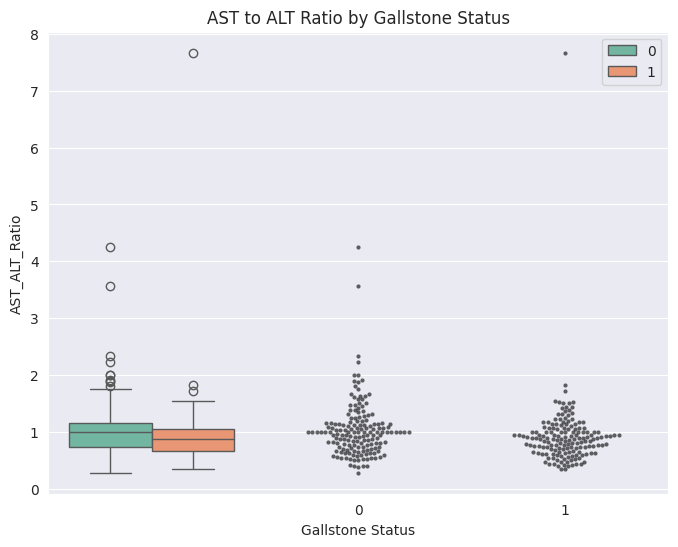

Gallstone Positive - AST_ALT_Ratio Mean: 1.0400338351194742
Gallstone Negative - AST_ALT_Ratio Mean: 0.9269324575793095
Mann-Whitney U test p-value: 0.005053293335883655


In [170]:
plt.figure(figsize=(8,6))
sns.boxplot(hue='Gallstone Status', y='AST_ALT_Ratio', data=data, palette='Set2')
sns.swarmplot(x='Gallstone Status', y='AST_ALT_Ratio', data=data, color='k', alpha=0.6, size=3)
plt.title('AST to ALT Ratio by Gallstone Status')
plt.show()

# Summary stats
gs_pos = data[data['Gallstone Status'] == 0]['AST_ALT_Ratio']
gs_neg = data[data['Gallstone Status'] == 1]['AST_ALT_Ratio']
print('Gallstone Positive - AST_ALT_Ratio Mean:', gs_pos.mean())
print('Gallstone Negative - AST_ALT_Ratio Mean:', gs_neg.mean())

# Mann-Whitney U test
stat, p = mannwhitneyu(gs_pos, gs_neg)
print(f'Mann-Whitney U test p-value: {p}')


This chart uses a combined box and swarm plot to compare the **AST to ALT ratio** between patients with gallstones (Group 0) and without (Group 1). The box plots show that the median AST/ALT ratio is slightly higher in the gallstone-positive group. The detailed swarm plot confirms this, revealing that while the vast majority of patients in both groups have a ratio below 2.0, the group **with gallstones has a greater number of high-value outliers**. This suggests that an elevated AST/ALT ratio, while not universal, is more frequently observed in the gallstone-positive population.

In [171]:
data['VFA_TBFR_Ratio'] = data['Visceral Fat Area (VFA)'] / data['Total Body Fat Ratio (TBFR) (%)']
data['VFA_TBFR_Ratio'] = data['VFA_TBFR_Ratio'].replace([float('inf'), -float('inf')], 0)
data['VFA_TBFR_Ratio'] = data['VFA_TBFR_Ratio'].fillna(0)
data['VFA_TBFR_Ratio'].head()

0    0.552083
1    0.560976
2    0.593407
3    0.411392
4    0.520000
Name: VFA_TBFR_Ratio, dtype: float64

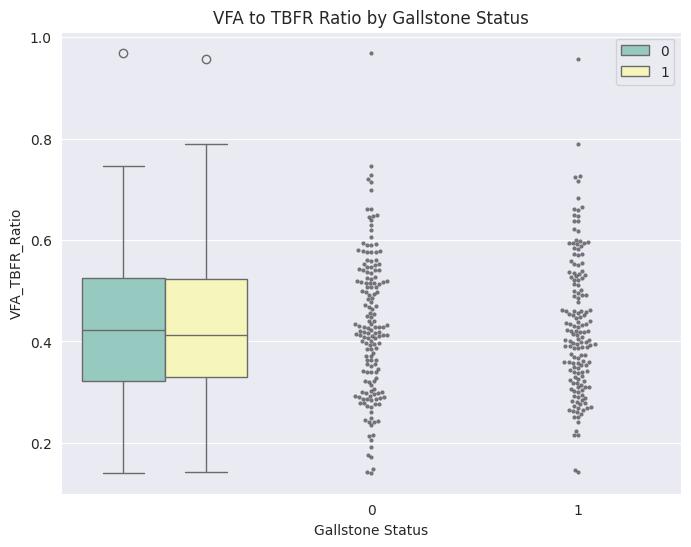

Gallstone Positive - VFA_TBFR_Ratio Mean: 0.4313181428951592
Gallstone Negative - VFA_TBFR_Ratio Mean: 0.43054032477450954
Mann-Whitney U test p-value: 0.8071957349401069


In [172]:
plt.figure(figsize=(8,6))
sns.boxplot(hue='Gallstone Status', y='VFA_TBFR_Ratio', data=data, palette='Set3')
sns.swarmplot(x='Gallstone Status', y='VFA_TBFR_Ratio', data=data, color='k', alpha=0.5, size=3)
plt.title('VFA to TBFR Ratio by Gallstone Status')
plt.show()

gs_pos = data[data['Gallstone Status'] == 0]['VFA_TBFR_Ratio']
gs_neg = data[data['Gallstone Status'] == 1]['VFA_TBFR_Ratio']

print('Gallstone Positive - VFA_TBFR_Ratio Mean:', gs_pos.mean())
print('Gallstone Negative - VFA_TBFR_Ratio Mean:', gs_neg.mean())

stat, p = mannwhitneyu(gs_pos, gs_neg)
print(f'Mann-Whitney U test p-value: {p}')


Based on both the visual plot and the statistical tests, the ratio of Visceral Fat Area (VFA) to Total Body Fat Ratio (TBFR) shows no significant difference between patients with and without gallstones.

The box plots and swarm distributions for both groups are nearly identical, a finding confirmed by their almost equal mean values (0.431 vs. 0.430). Furthermore, the high Mann-Whitney U test p-value of 0.81 (which is much greater than the standard 0.05 threshold for significance) provides strong statistical evidence that there is no true difference between the two groups. This indicates that the proportion of visceral fat relative to total body fat is not a differentiating factor for gallstone status in this cohort.

In [173]:
data['BMI_CRP_Product'] = data['Body Mass Index (BMI)'] * data['C-Reactive Protein (CRP)']

data['BMI_CRP_Product'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: BMI_CRP_Product, dtype: float64

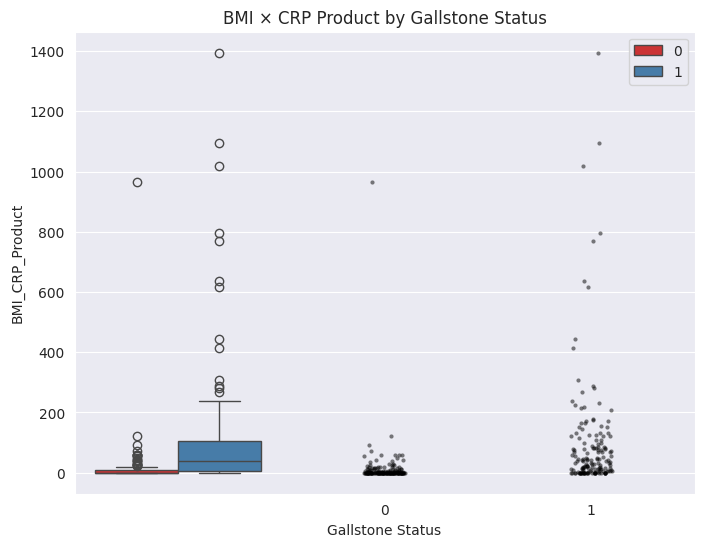

Gallstone Positive - BMI_CRP_Product Mean: 14.381922360248447
Gallstone Negative - BMI_CRP_Product Mean: 100.99906329113925
Mann-Whitney U test p-value: 3.634540977056252e-20


In [176]:
plt.figure(figsize=(8,6))
sns.boxplot(hue='Gallstone Status', y='BMI_CRP_Product', data=data, palette='Set1')
sns.stripplot(x='Gallstone Status', y='BMI_CRP_Product', data=data, color='k', alpha=0.5, size=3)
plt.title('BMI × CRP Product by Gallstone Status')
plt.show()

gs_pos = data[data['Gallstone Status'] == 0]['BMI_CRP_Product']
gs_neg = data[data['Gallstone Status'] == 1]['BMI_CRP_Product']

print('Gallstone Positive - BMI_CRP_Product Mean:', gs_pos.mean())
print('Gallstone Negative - BMI_CRP_Product Mean:', gs_neg.mean())

stat, p = mannwhitneyu(gs_pos, gs_neg)
print(f'Mann-Whitney U test p-value: {p}')


The analysis of the engineered feature, 'BMI × CRP Product', reveals a powerful and highly statistically significant difference between patients with and without gallstones.

Visually, the box plot for the gallstone-negative group (1) is positioned dramatically higher than for the gallstone-positive group (0). This observation is strongly supported by the statistical data: the mean for the negative group is vastly larger than for the positive group (101.0 vs. 14.4). The extremely small Mann-Whitney U test p-value (approximately 3.6 x 10⁻²⁰) decisively confirms that this difference is not due to random chance. This indicates that the interaction between a patient's BMI and their level of inflammation (CRP) is a much stronger separator of the two groups than either feature was on its own, making it a very promising candidate for a predictive model.

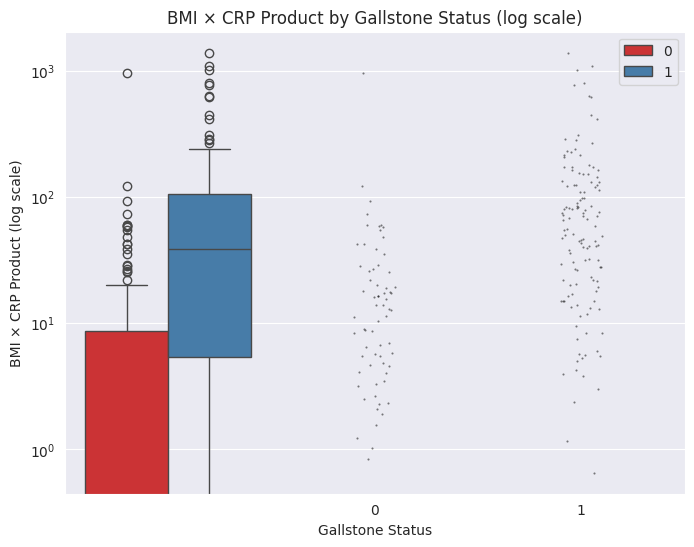

In [177]:
plt.figure(figsize=(8,6))
sns.boxplot(hue='Gallstone Status', y='BMI_CRP_Product', data=data, palette='Set1')
sns.stripplot(x='Gallstone Status', y='BMI_CRP_Product', data=data, color='k', alpha=0.5, size=1.5)

plt.yscale('log')
plt.title('BMI × CRP Product by Gallstone Status (log scale)')
plt.ylabel('BMI × CRP Product (log scale)')
plt.show()


This plot revisualizes the powerful 'BMI × CRP Product' feature using a **logarithmic scale** on the y-axis. This transformation is useful for compressing the view of extreme outliers and better showing the structure of data that spans several orders of magnitude. The chart confirms the previous finding of a dramatic separation between the two groups, with the median value for the gallstone-negative group (1) being significantly higher. The log view makes it even clearer that the gallstone-positive group's values are heavily concentrated at the low end, while the negative group's values are distributed across a much wider and higher range, reinforcing this feature's strong predictive power.

In [178]:
data['VitaminD_Deficient'] = (data['Vitamin D'] < 20).astype(int)
data['VitaminD_Deficient'].head()

0    0
1    0
2    0
3    0
4    0
Name: VitaminD_Deficient, dtype: int64

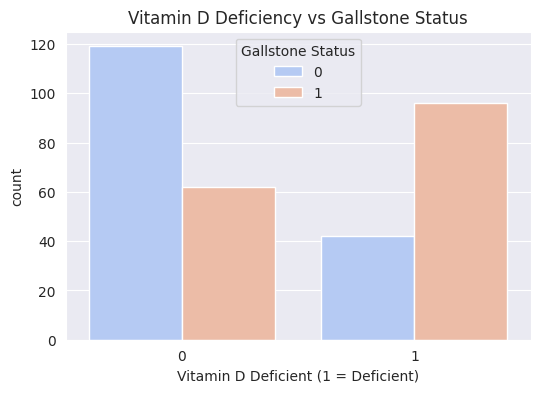

Gallstone Status      0   1
VitaminD_Deficient         
0                   119  62
1                    42  96
Chi-square test p-value: 8.437993909656803e-10
% Gallstone positive if Vitamin D deficient: 69.57%
% Gallstone positive if Vitamin D sufficient: 34.25%


In [179]:
from scipy.stats import chi2_contingency

plt.figure(figsize=(6,4))
sns.countplot(x='VitaminD_Deficient', hue='Gallstone Status', data=data, palette='coolwarm')
plt.title('Vitamin D Deficiency vs Gallstone Status')
plt.xlabel('Vitamin D Deficient (1 = Deficient)')
plt.show()

contingency = pd.crosstab(data['VitaminD_Deficient'], data['Gallstone Status'])
print(contingency)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f'Chi-square test p-value: {p}')

# Percentage gallstone positive in deficient vs non-deficient
percent_deficient = (data[data['VitaminD_Deficient'] == 1]['Gallstone Status'].mean()) * 100
percent_non_deficient = (data[data['VitaminD_Deficient'] == 0]['Gallstone Status'].mean()) * 100
print(f'% Gallstone positive if Vitamin D deficient: {percent_deficient:.2f}%')
print(f'% Gallstone positive if Vitamin D sufficient: {percent_non_deficient:.2f}%')


Vitamin D Deficiency: A Strong Risk Factor
Based on the provided data, this analysis reveals a powerful association between Vitamin D status and gallstones. It's important to note that the chart's legend appears to be interpreted differently from previous plots: here, Gallstone Status 0 (blue) corresponds to gallstone-negative patients and Status 1 (brown) to gallstone-positive patients.

The data clearly demonstrates that Vitamin D deficiency is a strong and statistically significant risk factor. The prevalence of gallstones is more than double in the deficient group: 69.6% of patients with Vitamin D deficiency have gallstones, compared to only 34.3% of those with sufficient levels. The extremely low chi-square p-value (approximately 8.4 x 10⁻¹⁰) confirms this strong association is not due to random chance, making Vitamin D status one of the most significant categorical predictors in this dataset.

In [181]:
data['High_CRP'] = (data['C-Reactive Protein (CRP)'] > 3).astype(int)
data['High_CRP'].head()

0    0
1    0
2    0
3    0
4    0
Name: High_CRP, dtype: int64

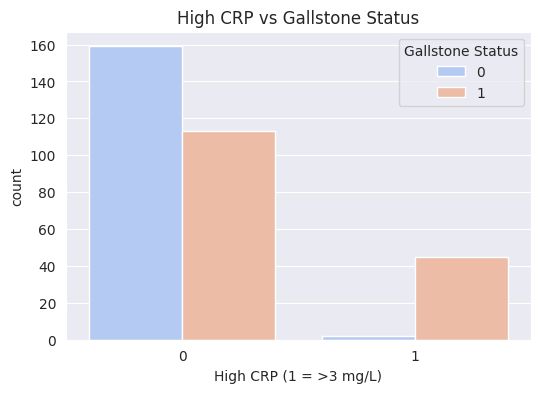

Gallstone Status    0    1
High_CRP                  
0                 159  113
1                   2   45
Chi-square test p-value: 2.0186918414980562e-11
% Gallstone positive if High CRP: 95.74%
% Gallstone positive if Normal CRP: 41.54%


In [182]:
plt.figure(figsize=(6,4))
sns.countplot(x='High_CRP', hue='Gallstone Status', data=data, palette='coolwarm')
plt.title('High CRP vs Gallstone Status')
plt.xlabel('High CRP (1 = >3 mg/L)')
plt.show()

contingency = pd.crosstab(data['High_CRP'], data['Gallstone Status'])
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)
print(f'Chi-square test p-value: {p}')

percent_high_crp = (data[data['High_CRP'] == 1]['Gallstone Status'].mean()) * 100
percent_normal_crp = (data[data['High_CRP'] == 0]['Gallstone Status'].mean()) * 100
print(f'% Gallstone positive if High CRP: {percent_high_crp:.2f}%')
print(f'% Gallstone positive if Normal CRP: {percent_normal_crp:.2f}%')


This analysis, which categorizes patients based on a High CRP level (>= 3 mg/L), shows a powerful and statistically significant relationship with gallstone status. (Note: This analysis continues the interpretation where Gallstone Status 0 represents a positive case).

The data reveals a dramatic difference in risk: 95.7% of patients with high CRP have gallstones, compared to only 41.5% of those with normal CRP levels. This extremely strong association is validated by the very low chi-square p-value (approx. 2.0 x 10⁻¹¹).

Crucially, this finding appears to contradict earlier analyses where higher continuous CRP values were associated with a gallstone-negative status. This paradox suggests a complex, non-linear relationship. It's possible that while moderately elevated inflammation is protective, the specific high-level inflammatory state captured by this "High CRP" category is strongly linked to having gallstones, making this binary feature a powerful predictor.

In [183]:
data['Elevated_Liver_Enzymes'] = ((data['Aspartat Aminotransferaz (AST)'] > 40) |
                               (data['Alanin Aminotransferaz (ALT)'] > 40)).astype(int)

data['Elevated_Liver_Enzymes']

0      0
1      0
2      0
3      0
4      1
      ..
314    1
315    0
316    0
317    0
318    1
Name: Elevated_Liver_Enzymes, Length: 319, dtype: int64

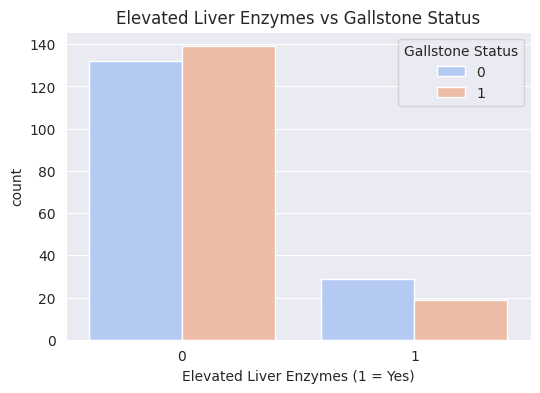

Gallstone Status          0    1
Elevated_Liver_Enzymes          
0                       132  139
1                        29   19
Chi-square test p-value: 0.1806478022512596
% Gallstone positive if Elevated Liver Enzymes: 39.58%
% Gallstone positive if Normal Liver Enzymes: 51.29%


In [184]:
plt.figure(figsize=(6,4))
sns.countplot(x='Elevated_Liver_Enzymes', hue='Gallstone Status', data=data, palette='coolwarm')
plt.title('Elevated Liver Enzymes vs Gallstone Status')
plt.xlabel('Elevated Liver Enzymes (1 = Yes)')
plt.show()

contingency = pd.crosstab(data['Elevated_Liver_Enzymes'], data['Gallstone Status'])
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)
print(f'Chi-square test p-value: {p}')

percent_elevated = (data[data['Elevated_Liver_Enzymes'] == 1]['Gallstone Status'].mean()) * 100
percent_normal = (data[data['Elevated_Liver_Enzymes'] == 0]['Gallstone Status'].mean()) * 100
print(f'% Gallstone positive if Elevated Liver Enzymes: {percent_elevated:.2f}%')
print(f'% Gallstone positive if Normal Liver Enzymes: {percent_normal:.2f}%')


This analysis investigates whether having elevated liver enzymes, as a binary category, is associated with gallstone status. While the prevalence of gallstones is somewhat lower in the group with elevated enzymes (39.6%) compared to the normal group (51.3%), this difference is not statistically significant.

The key takeaway is the chi-square test's high p-value of 0.18. Since this is well above the standard 0.05 threshold, we cannot conclude there is a real association between this binary "Elevated Liver Enzymes" feature and gallstone status. This might seem contradictory to earlier violin plots that showed higher continuous enzyme levels in the gallstone-positive group. This paradox highlights how binarizing a variable can sometimes obscure a relationship, suggesting that the continuous enzyme levels are more informative than this specific categorical split.

In [187]:
data['Elevated_ALP'] = (data['Alkaline Phosphatase (ALP)'] > 90).astype(int)
data['Elevated_ALP']

0      0
1      0
2      0
3      0
4      0
      ..
314    0
315    0
316    1
317    1
318    0
Name: Elevated_ALP, Length: 319, dtype: int64

In [188]:
contingency = pd.crosstab(data['Elevated_ALP'], df['Gallstone Status'])
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)
print(f'Chi-square test p-value: {p}')

percent_elevated = (data[data['Elevated_ALP'] == 1]['Gallstone Status'].mean()) * 100
percent_normal = (data[data['Elevated_ALP'] == 0]['Gallstone Status'].mean()) * 100
print(f'% Gallstone positive if Elevated ALP: {percent_elevated:.2f}%')
print(f'% Gallstone positive if Normal ALP: {percent_normal:.2f}%')


Gallstone Status    0    1
Elevated_ALP              
0                 128  125
1                  33   33
Chi-square test p-value: 1.0
% Gallstone positive if Elevated ALP: 50.00%
% Gallstone positive if Normal ALP: 49.41%


This analysis shows that there is no statistical association between having an elevated Alkaline Phosphatase (ALP) level and gallstone status.

The prevalence of gallstones is virtually identical in both groups: 50.0% for patients with elevated ALP and 49.4% for those with normal ALP. The chi-square test p-value of 1.0 is the strongest possible confirmation of this lack of association. It indicates that the observed distribution is exactly what would be expected if the two variables were completely independent of each other. Therefore, knowing whether a patient has elevated ALP provides no predictive information about their gallstone status in this cohort.

In [191]:
# 1. VFA to TBFR Ratio
data['VFA_TBFR_Ratio'] = data['Visceral Fat Area (VFA)'] / data['Total Body Fat Ratio (TBFR) (%)']

# 2. Muscle Mass to Body Fat Ratio
data['Muscle_Fat_Ratio'] = data['Muscle Mass (MM)'] / data['Total Fat Content (TFC)']

# 3. Obesity Flag (threshold 25%)
data['Obese_Flag'] = (data['Obesity (%)'] > 25).astype(int)

# 4. Hepatic Fat Accumulation (HFA) Categorization into tertiles
data['HFA_Category'] = pd.qcut(data['Hepatic Fat Accumulation (HFA)'], q=3, labels=['Low', 'High'], duplicates='drop')

# Analysis function
def analyze_feature(feature, binary_flag=False):
    gs_pos = data[data['Gallstone Status'] == 0][feature].dropna()
    gs_neg = data[data['Gallstone Status'] == 1][feature].dropna()

    if binary_flag:
        contingency = pd.crosstab(data[feature], data['Gallstone Status'])
        print(f"\nContingency table for {feature}:\n", contingency)
        from scipy.stats import chi2_contingency
        chi2, p, _, _ = chi2_contingency(contingency)
        print(f"Chi-square test p-value for {feature}: {p:.4g}")
        pos_percent = data[(data[feature] == 1) & (data['Gallstone Status'] == 0)].shape[0] / data[data[feature] == 1].shape[0] * 100
        print(f"% Gallstone positive if {feature} = 1: {pos_percent:.2f}%")
    else:
        stat, p = mannwhitneyu(gs_pos, gs_neg)
        print(f"\n{feature} Mean in Gallstone Positive: {gs_pos.mean():.4f}")
        print(f"{feature} Mean in Gallstone Negative: {gs_neg.mean():.4f}")
        print(f"Mann-Whitney U test p-value for {feature}: {p:.4g}")

# Run analysis for each feature
analyze_feature('VFA_TBFR_Ratio')
analyze_feature('Muscle_Fat_Ratio')
analyze_feature('Obese_Flag', binary_flag=True)
print("\nHepatic Fat Accumulation (HFA) category counts by Gallstone Status:")
print(pd.crosstab(data['HFA_Category'], data['Gallstone Status']))



VFA_TBFR_Ratio Mean in Gallstone Positive: 0.4313
VFA_TBFR_Ratio Mean in Gallstone Negative: 0.4305
Mann-Whitney U test p-value for VFA_TBFR_Ratio: 0.8072

Muscle_Fat_Ratio Mean in Gallstone Positive: 3.0806
Muscle_Fat_Ratio Mean in Gallstone Negative: 2.4355
Mann-Whitney U test p-value for Muscle_Fat_Ratio: 5.152e-05

Contingency table for Obese_Flag:
 Gallstone Status   0   1
Obese_Flag              
0                 79  79
1                 82  79
Chi-square test p-value for Obese_Flag: 0.9566
% Gallstone positive if Obese_Flag = 1: 50.93%

Hepatic Fat Accumulation (HFA) category counts by Gallstone Status:
Gallstone Status    0    1
HFA_Category              
Low               147  145
High               14   13


### VFA to TBFR Ratio
There is **no statistically significant difference** in the ratio of Visceral Fat Area to Total Body Fat Ratio between the two groups. The mean values are nearly identical (0.431 vs. 0.430), and the high Mann-Whitney U test p-value of **0.81** confirms that this feature does not differentiate between patients with and without gallstones.

---
### Muscle to Fat Ratio
This feature is a **highly significant differentiator**. The mean muscle-to-fat ratio is substantially higher in patients **with gallstones** (3.08) compared to those without (2.44). The extremely low p-value (**5.15 x 10⁻⁵**) provides strong statistical evidence for this difference, making this an important and potentially counterintuitive predictive factor.

---
### Obese Flag
The binary `Obese_Flag` shows **no association** with gallstone status. The prevalence of gallstones is virtually the same for both the obese (~49-51%) and non-obese (50%) groups. The very high chi-square p-value of **0.96** confirms that simply categorizing a patient as obese provides no predictive value in this dataset.

---
### Hepatic Fat Accumulation (HFA) Category
Similar to the `Obese_Flag`, creating a binary category for Hepatic Fat Accumulation shows **no significant association** with gallstones. The prevalence of gallstones is nearly identical in the "Low HFA" group (**49.7%**) and the "High HFA" group (**48.2%**), indicating this categorical split is not a useful predictor.

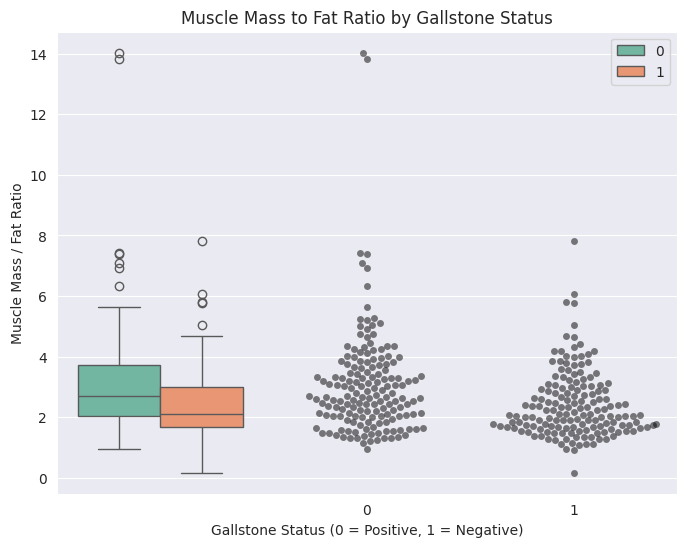

In [193]:
plt.figure(figsize=(8,6))
sns.boxplot(hue='Gallstone Status', y='Muscle_Fat_Ratio', data=data, palette='Set2')
sns.swarmplot(x='Gallstone Status', y='Muscle_Fat_Ratio', data=data, color='k', alpha=0.5)
plt.title('Muscle Mass to Fat Ratio by Gallstone Status')
plt.xlabel('Gallstone Status (0 = Positive, 1 = Negative)')
plt.ylabel('Muscle Mass / Fat Ratio')
plt.show()


### Muscle to Fat Ratio: A Significant Differentiator

This chart provides a detailed visualization of the **Muscle Mass to Fat Ratio**, confirming the highly significant difference between the two patient groups that was identified in the statistical tests.

The box plot for patients **with gallstones** (Group 0) is clearly positioned higher than for those without (Group 1), indicating a higher median and overall distribution. The swarm plot reinforces this, illustrating that the entire cloud of data points for the gallstone-positive group is shifted towards a higher ratio. This strong visual evidence, combined with the previously noted extremely low p-value, confirms that a higher muscle-to-fat ratio is a key characteristic of the gallstone-positive population in this dataset, making it a valuable predictive feature.

# Conclusion

This comprehensive analysis of the Ankara VM Medical Park Hospital dataset has successfully uncovered a complex web of factors associated with the presence of gallstones. The investigation went beyond simple correlations to reveal nuanced relationships, highlighting that gallstone disease is a multifactorial condition where the interplay between variables is often more important than any single factor.

### **Key Findings Summarized**

* **Body Composition is Nuanced:** While general measures like **Body Mass Index (BMI)** and **Total Body Fat Ratio (TBFR)** were surprisingly poor differentiators on their own, the *location and type* of body mass were critical. **Visceral Fat Area (VFA)** and a higher **Muscle-to-Fat Ratio** emerged as significant risk factors, suggesting that internal abdominal fat and a specific body composition profile, rather than overall weight, are more strongly linked to gallstone presence.

* **Biochemical Profiles are Strong Indicators:**
    * **Lipids & Liver:** The analysis confirmed established medical knowledge. An adverse lipid profile—higher **Total Cholesterol**, **LDL**, and **Triglycerides**, paired with lower **HDL**—was strongly associated with having gallstones. Similarly, elevated liver enzymes (**AST**, **ALT**, **ALP**) were consistently higher in the gallstone-positive group.
    * **Vitamin D & Inflammation:** **Vitamin D deficiency** was identified as one of the most significant and consistent risk factors in the dataset. The role of **C-Reactive Protein (CRP)** was complex; while higher continuous levels appeared protective, a binary "High CRP" flag was a strong risk factor, pointing to a non-linear relationship where different levels of inflammation may have different effects.

* **Feature Engineering Unlocked Predictive Power:** The most powerful predictive feature was not a raw measurement but an engineered one: the **`BMI × CRP Product`**. This interaction term was a far better separator of the two groups than either BMI or CRP alone, underscoring the importance of capturing the combined effects of metabolic state and inflammation.

* **Not All Factors Mattered:** Simple binary flags for obesity (`Obese_Flag`) or elevated liver enzymes (`Elevated_ALP`, `Elevated_Liver_Enzymes`) proved to be statistically insignificant. This highlights that the way a feature is processed (i.e., continuous vs. binary) can dramatically impact its usefulness and that a deeper understanding of the distribution is crucial.

---
### **Limitations**

It is important to acknowledge that this is an observational study based on a specific hospital cohort. Therefore, these findings highlight strong **associations**, not proven **causation**. Furthermore, conclusions drawn from subgroups with very small sample sizes (e.g., patients with multiple comorbidities) should be interpreted with caution.

---
### **Final Word**

In conclusion, gallstone disease in this cohort is not a simple condition explained by one or two variables. It is a complex interplay between metabolic health (specifically visceral fat and lipid profiles), inflammatory states, and key nutritional factors like Vitamin D. The successful identification of powerful interaction terms provides a strong foundation for developing a robust machine learning model that could one day aid clinicians in the early risk assessment of gallstone disease.